**Projet 6 : Classifiez automatiquement des biens de consommation**

* Consignes : https://openclassrooms.com/fr/projects/631/assignment
* Données : https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Textimage+DAS+V2/Dataset+projet+pre%CC%81traitement+textes+images.zip
* Documentation API Amazon : https://docs.aws.amazon.com/fr_fr/AWSECommerceService/latest/DG/ItemSearch.html

le corpus : un ensemble de documents (des textes dans notre cas), regroupés dans une optique ou dans une thématique précise. 

un document : la notion de document fait référence à un texte appartenant au corpus, mais indépendant des autres textes. Il peut être constitué d'une ou plusieurs phrases, un ou plusieurs paragraphes.

un token : le terme token désigne généralement un mot et/ou un élément de ponctuation. La phrase "Hello World!" comprend donc 3 tokens. 

le vocabulaire : il s'agit de l'ensemble des tokens distincts présents dans l'ensemble du corpus.

**Etude de faisabilité du moteur de classification**

Votre mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

Pour ce faire, vous allez évaluer la possibilité d'extraire des données depuis l'API Amazon en prenant connaissance de la documentation et en écrivant la requête qui vous permettrait d'extraire des données supplémentaires. Vous vous assurerez ainsi que vous pourrez bien disposer de plus de données et diversifier les sources de données pour éviter les biais pour votre moteur de classification.

**Contraintes**

Linda vous a communiqué les contraintes suivantes :

* Limiter le nombre d’articles pris par l’API (par exemple : 1000 lignes) et filtrer sur un unique type d’article (par exemple un type d’article peu présent dans votre échantillon de données actuelles).
* Afin d’extraire les features, mettre en œuvre a minima un algorithme de type SIFT / ORB / SURF.
* Un algorithme de type CNN Transfer Learning peut éventuellement être utilisé en complément, s’il peut apporter un éclairage supplémentaire à la démonstration.


In [83]:
# !pip install opencv-python
# !pip install --upgrade numpy
# %pip install transformers
# %pip install torch
%pip install tensorflow-hub
# !pip install tensorflow
# !pip install opencv-contrib-python
# !pip install tensorflow

#%pip install opencv-python
#%pip install nltk
# %pip install gensim


  Obtaining dependency information for tensorflow-hub from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.3/90.3 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
# pip install pandas numpy matplotlib seaborn opencv-python nltk scikit-learn keras tensorflow pillow


In [4]:
# pip install nltk

In [5]:
# !pip install opencv-contrib-python

In [6]:
# from sklearn.feature_extraction.text import CountVectorizer

# # Corpus de documents
# documents = ["Je suis à la maison", "La maison est dans la prairie", "Je suis à la plage"]

# # Créer un objet CountVectorizer
# vectorizer = CountVectorizer()

# # Appliquer le vectorizer pour transformer le corpus en représentation BoW
# X = vectorizer.fit_transform(documents)

# # Obtenir le vocabulaire initial
# vocabulaire_initial = ["Je", "suis", "à", "la", "maison", "est", "dans", "prairie", "plage"]

# # Convertir les mots du vocabulaire initial en minuscules
# vocabulaire_initial_minuscules = [mot.lower() for mot in vocabulaire_initial]

# # Obtenir l'index du vocabulaire initial dans le vocabulaire réel
# index_ordre_initial = [vectorizer.vocabulary_.get(mot, -1) for mot in vocabulaire_initial_minuscules]

# # Réorganiser la matrice BoW selon le nouvel ordre
# X_trie = X[:, index_ordre_initial]

# # Afficher le résultat trié
# print("Vocabulaire trié:", vocabulaire_initial)
# print("Représentation BoW triée:")
# print(X_trie.toarray())


In [7]:
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Corpus de documents
# documents = ["Je suis à la maison", "La maison est dans la prairie", "Je suis à la plage"]

# # Créer un objet TfidfVectorizer
# vectorizer = TfidfVectorizer()

# # Appliquer le vectorizer pour transformer le corpus en matrice TF-IDF
# tfidf_matrix = vectorizer.fit_transform(documents)

# # Obtenir le vocabulaire
# vocabulaire = vectorizer.get_feature_names_out()

# # Trouver l'index du mot "la" dans le vocabulaire
# indice_mot_la = np.where(vocabulaire == "la")[0][0]

# # Extraire la colonne correspondante au mot "la" dans la matrice TF-IDF
# colonne_mot_la = tfidf_matrix[:, indice_mot_la]

# # Convertir la colonne en un tableau numpy
# colonne_mot_la = colonne_mot_la.toarray()

# # Afficher la colonne TF-IDF pour le mot "la"
# print("Colonne TF-IDF pour le mot 'la':")
# print(colonne_mot_la)


In [8]:
# # from nltk.util import ngrams
# # import re

# # # Phrase donnée
# # phrase = "La seconde partie du cours de traitement de texte"

# # # Tokenisation de la phrase en mots (ignorant la ponctuation)
# # mots = re.findall(r'\b\w+\b', phrase.lower())

# # # Génération des trigrammes
# # trigrammes = list(ngrams(mots, 3))

# # # Affichage des trigrammes
# # for trigramme in trigrammes:
# #     print(" ".join(trigramme))
    
# # # Nombre total de trigrammes
# # nombre_de_trigrammes = len(trigrammes)
# # print("Nombre de trigrammes :", nombre_de_trigrammes)
# # 
# import re

# # Phrase donnée
# phrase = "La seconde partie du cours de traitement de texte traite de la transformation des données textuelles"

# # Tokenisation de la phrase en mots (ignorant la ponctuation)
# mots = re.findall(r'\b\w+\b', phrase.lower())

# # Génération des trigrammes
# trigrammes = [mots[i:i+3] for i in range(len(mots) - 2)]

# # Affichage des trigrammes
# for trigramme in trigrammes:
#     print(" ".join(trigramme))
    
# # Nombre total de trigrammes
# nombre_de_trigrammes = len(trigrammes)
# print("Nombre de trigrammes :", nombre_de_trigrammes)


In [9]:
# from gensim.models import Word2Vec

# # Corpus de phrases d'exemple (vous pouvez utiliser un corpus plus vaste)
# corpus = [
#     "boy is a male child",
#     "girl is a female child",
#     "son is a male child's offspring",
#     "daughter is a female child's offspring",
# ]

# # Tokenisation des phrases en mots
# corpus_tokenise = [sentence.split() for sentence in corpus]

# # Entraînement du modèle Word2Vec
# model = Word2Vec(corpus_tokenise, vector_size=100, window=5, min_count=1, sg=0)

# # Test de l'opération "boy - son + daughter"
# resultat = model.wv.most_similar(positive=['boy', 'daughter'], negative=['son'], topn=1)

# # Affichage du résultat
# print("Résultat de l'opération 'boy - son + daughter':")
# print(resultat)


# Chargement et nettoyage

**Imports**

In [10]:
# OpenCV (cv2) pour SIFT
# import cv2

In [11]:
# Assurez-vous d'installer les bibliothèques nécessaires avec pip ou conda avant de les importer.

# Pandas et NumPy pour la manipulation des données
import pandas as pd
import numpy as np

# Matplotlib et Seaborn pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# OpenCV (cv2) pour SIFT
import cv2

# NLTK pour le traitement du texte
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation

# Scikit-Learn pour l'apprentissage automatique
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Keras (tensorflow) pour l'apprentissage en profondeur
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential, clone_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.applications.vgg16 import preprocess_input, VGG16

# Autres bibliothèques
from ipywidgets import IntProgress, Text
from IPython.display import display, Image
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL
import time

2023-09-25 21:34:05.289939: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 21:34:05.342945: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-25 21:34:05.344569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-25 21:34:06.510890: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
import cv2
print("Version d'OpenCV:", cv2.__version__)

Version d'OpenCV: 4.8.0


In [13]:
import pathlib
pathlib.Path().resolve()

PosixPath('/home/jovyan')

In [14]:
data = pd.read_csv('work/data/flipkart_com-ecommerce_sample_1050.csv')

In [15]:
data.shape

(1050, 15)

In [16]:
data.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
649,7cf36a3f1f2bd785954cc876a941da40,2016-03-03 22:49:41 +0000,http://www.flipkart.com/klocx-analog-wall-cloc...,KLOCX Analog Wall Clock,"[""Home Decor & Festive Needs >> Wall Decor & C...",WCKEGG6YZUBZUVXD,1672.0,836.0,7cf36a3f1f2bd785954cc876a941da40.jpg,False,Key Features of KLOCX Analog Wall Clock Black ...,No rating available,No rating available,KLOCX,"{""product_specification""=>[{""key""=>""Model Numb..."
504,cd089e2ef349a7f00dcdbf28965914f6,2016-01-07 05:50:25 +0000,http://www.flipkart.com/lapguard-hp-pavilion-d...,Lapguard HP Pavilion dv5-1008ax 6 Cell Laptop ...,"[""Computers >> Laptop Accessories >> Batteries...",ACCDQDYBYVQZNHCH,3999.0,1699.0,cd089e2ef349a7f00dcdbf28965914f6.jpg,False,Buy Lapguard HP Pavilion dv5-1008ax 6 Cell Lap...,No rating available,No rating available,Lapguard,"{""product_specification""=>[{""key""=>""In The Box..."
799,5188dd28a627807407d93549580afb74,2015-12-12 11:46:53 +0000,http://www.flipkart.com/rajrang-animal-cushion...,Rajrang Animal Cushions Cover,"[""Home Furnishing >> Cushions, Pillows & Cover...",CPCE8URTHJE6AK3N,2149.0,984.0,5188dd28a627807407d93549580afb74.jpg,False,Buy Rajrang Animal Cushions Cover at Rs. 984 a...,No rating available,No rating available,Rajrang,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
789,389197b67a189c703f3deb9ca6f1f678,2015-12-12 11:46:53 +0000,http://www.flipkart.com/love-baby-cartoon-set-...,Love Baby Cartoon Set of Towels,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWDN9FZJWX4TBMZ,638.0,425.0,389197b67a189c703f3deb9ca6f1f678.jpg,False,Buy Love Baby Cartoon Set of Towels at Rs. 425...,4.3,4.3,Love Baby,"{""product_specification""=>[{""key""=>""Material"",..."
593,87f256eeace1a0c2b1f934f061646da5,2016-05-10 11:57:25 +0000,http://www.flipkart.com/greenwich-baby-girl-s-...,GREENWICH Baby Girl's Black Jeggings,"[""Baby Care >> Infant Wear >> Baby Girls' Clot...",LJGEHB6FRGN73YZA,225.0,225.0,87f256eeace1a0c2b1f934f061646da5.jpg,False,Key Features of GREENWICH Baby Girl's Black Je...,No rating available,No rating available,GREENWICH,"{""product_specification""=>[{""value""=>""1 JEGGIN..."


In [17]:
data.isna().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

**Nettoyage catégories**

In [18]:
data['product_category_tree'].nunique()

642

In [19]:
# #Traitement des catégories
# Fonction pour extraire une catégorie d'un niveau spécifique
def split_categories(category, level):
    '''Cette fonction prend une catégorie et un niveau en entrée, puis extrait la catégorie du niveau spécifié.'''
    # Sépare la chaîne de catégorie en utilisant les guillemets et prend la partie entre les guillemets
    category = category.split('["')[1].split('"]')[0]
    cat = category.split(' >> ')  # Divise la catégorie en niveaux en utilisant ' >> '
    
    # Gère les cas où il peut manquer des niveaux de catégorie (remplace les manquants par 'None')
    if len(cat) < 3:
        cat = [cat[0], cat[1], 'None']
        if len(cat) < 2:
            cat = [cat[0], 'None', 'None']
    
    return cat[level]  # Retourne la catégorie du niveau spécifié

# Fonctions pour extraire les catégories de chaque niveau
def split_categories_1(category):
    return split_categories(category, 0)

def split_categories_2(category):
    return split_categories(category, 1)

def split_categories_3(category):
    return split_categories(category, 2)

# Fonction principale pour traiter les catégories dans le DataFrame
def detail_categories(dataframe):
    '''Cette fonction prend un DataFrame en entrée, applique les fonctions d'extraction de catégories
    et crée trois nouvelles colonnes : cat_lvl_1, cat_lvl_2 et cat_lvl_3, puis supprime la colonne d'origine.'''
    # Applique les fonctions d'extraction de catégories pour chaque niveau et crée de nouvelles colonnes
    dataframe['cat_lvl_1'] = dataframe['product_category_tree'].apply(split_categories_1)
    dataframe['cat_lvl_2'] = dataframe['product_category_tree'].apply(split_categories_2)
    dataframe['cat_lvl_3'] = dataframe['product_category_tree'].apply(split_categories_3)
    
    # Supprime la colonne d'origine 'product_category_tree' du DataFrame
    return dataframe.drop(['product_category_tree'], axis=1)

Ce code prend un DataFrame contenant des informations sur les produits, y compris une colonne "product_category_tree" qui contient des catégories de produits imbriquées. Il extrait ces catégories et les divise en trois niveaux distincts (cat_lvl_1, cat_lvl_2 et cat_lvl_3). En fin de compte, la colonne d'origine "product_category_tree" est supprimée du DataFrame, laissant place aux catégories extraites.

In [20]:
data = detail_categories(data)

In [21]:
data.sample(3)

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3
1036,5a54c78b52c984e56500809e5bc27ae1,2016-03-03 06:06:42 +0000,http://www.flipkart.com/print-shapes-red-bull-...,PRINT SHAPES Red bull Laptop Skin with Mouse p...,LACEGEZDGRYHKZWT,999.0,329.0,5a54c78b52c984e56500809e5bc27ae1.jpg,False,Key Features of PRINT SHAPES Red bull Laptop S...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,Laptop Accessories,Computer Accessories Combos
835,c5720509a67da707afcb6f4f0282d529,2015-12-29 05:07:38 +0000,http://www.flipkart.com/amaze-fashion-universa...,Amaze Fashion Universal Portable Lamp PL014AMA...,USGE8R7KG4TYZPV5,199.0,88.0,c5720509a67da707afcb6f4f0282d529.jpg,False,Buy Amaze Fashion Universal Portable Lamp PL01...,No rating available,No rating available,Amaze Fashion,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,Laptop Accessories,USB Gadgets
852,70af4c3c05688d8400632e134f258b98,2015-12-29 05:07:38 +0000,http://www.flipkart.com/memore-portable-flexib...,Memore Portable and Flexible LED Light Lamp MM...,USGEE27EHJBEYVVA,499.0,190.0,70af4c3c05688d8400632e134f258b98.jpg,False,Memore Portable and Flexible LED Light Lamp MM...,No rating available,No rating available,Memore,"{""product_specification""=>[{""key""=>""Lamp Adjus...",Computers,Laptop Accessories,USB Gadgets


In [22]:
data_level = data.copy()

In [23]:
# data.groupby('cat_lvl_2').count()['uniq_id'].sort_values(ascending=False)
# Résumé : Ce code regroupe les données du DataFrame par la deuxième catégorie de niveau (cat_lvl_2),
# compte le nombre d'éléments uniques (uniq_id) dans chaque groupe, puis trie les résultats par ordre décroissant.

# Regroupe les données par la deuxième catégorie de niveau (cat_lvl_2)
grouped_data = data.groupby('cat_lvl_2')

# Compte le nombre d'éléments uniques (uniq_id) dans chaque groupe
counted_data = grouped_data.count()['uniq_id']

# Trie les résultats par ordre décroissant
sorted_data = counted_data.sort_values(ascending=False)

# Affiche les résultats triés
sorted_data

cat_lvl_2
Wrist Watches                149
Laptop Accessories            87
Infant Wear                   84
Coffee Mugs                   74
Showpieces                    71
                            ... 
Dinnerware & Crockery          1
Men's Grooming                 1
Beauty Accessories             1
Kripa's Home Furnishing        1
Consumables & Disposables      1
Name: uniq_id, Length: 62, dtype: int64

Ce code effectue une analyse des données en regroupant d'abord les données du DataFrame par la deuxième catégorie de niveau (cat_lvl_2). Ensuite, il compte le nombre d'éléments uniques (représentés par la colonne 'uniq_id') dans chaque groupe de catégories. Enfin, il trie ces résultats par ordre décroissant, ce qui permet d'obtenir un classement des catégories de niveau 2 en fonction du nombre d'éléments uniques qu'elles contiennent.

In [24]:
data.groupby('cat_lvl_3').count()['uniq_id'].sort_values(ascending=False)

cat_lvl_3
Deodorants                   65
Blankets, Quilts & Dohars    57
Baby Girls' Clothes          49
Routers                      49
USB Gadgets                  38
                             ..
Makeup Accessories            1
Malhar Showpieces             1
Mars Combos and Kits          1
Marvel Wrist Watches          1
posterchacha Coffee Mugs      1
Name: uniq_id, Length: 242, dtype: int64

In [25]:
data.to_csv('work/data/data_categories.csv')

# Requête API Amazon

Pour ce faire, vous allez évaluer la possibilité d'extraire des données depuis l'API Amazon en prenant connaissance de la documentation et en écrivant la requête qui vous permettrait d'extraire des données supplémentaires. Vous vous assurerez ainsi que vous pourrez bien disposer de plus de données et diversifier les sources de données pour éviter les biais pour votre moteur de classification.

Contraintes :

* Limiter le nombre d’articles pris par l’API (par exemple : 1000 lignes) et filtrer sur un unique type d’article (par exemple un type d’article peu présent dans votre échantillon de données actuelles).

On va chercher à faire une requête qui extrait des données d'articles correspondant aux catégories les moins représentées du jeu de données : elles permettront de compléter le base de données avec de nouveaux individus

In [26]:
#Identification des catégories les moins représentées
occurence_cat = pd.DataFrame(data['cat_lvl_2'].value_counts())

In [27]:
occurence_cat.head()

,count
cat_lvl_2,
Wrist Watches,149
Laptop Accessories,87
Infant Wear,84
Coffee Mugs,74
Showpieces,71


In [30]:
#identification des catégories pour lesquelles on a le moins d'occurence
cat_to_fill = occurence_cat[occurence_cat['count']<10]
cat_to_fill.sample(5)

,count
cat_lvl_2,
Laptops,2
Housekeeping & Laundry,1
Floor Coverings,6
Computer Components,2
Pressure Cookers & Pans,1


Requete pour chaque catégorie de produit :

Exemple

http://webservices.amazon.com/onca/xml?
Service=AWSECommerceService&
AWSAccessKeyId=[AWS Access Key ID]&
AssociateTag=[Associate ID]&
Operation=ItemSearch& #recherche d'article
Keywords=handbag& #titre du produit
VariationPage=1& #première page uniquement
Sort=salesrank #tri en fonction des produits qui se vendent le plus en premier


# Préparation des données

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#train, test = train_test_split(data.sample(200, random_state=42), test_size = 0.25, random_state=42)
train, test = train_test_split(data, test_size = 0.25, random_state=42)
#del data

In [35]:
train.to_csv('work/data/train.csv')
test.to_csv('work/data/test.csv')

In [36]:
train

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3
165,785b4383b12106dd172306d427d8f7b2,2015-12-01 12:40:44 +0000,http://www.flipkart.com/rockmantra-cute-two-ca...,Rockmantra Cute Two Cats Ceramic Mug,MUGEAGGKFBTYPN4Z,499.0,349.0,785b4383b12106dd172306d427d8f7b2.jpg,False,Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va...",Kitchen & Dining,Coffee Mugs,Rockmantra Coffee Mugs
248,45d0af2c709de47268c80c35a117de44,2015-12-01 12:40:44 +0000,http://www.flipkart.com/malhar-niko-male-doll-...,Malhar Niko Male Doll Showpiece - 25 cm,SHIEY382SR75SXEY,6395.0,5436.0,45d0af2c709de47268c80c35a117de44.jpg,True,Buy Malhar Niko Male Doll Showpiece - 25 cm ...,No rating available,No rating available,Malhar,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Decor & Festive Needs,Showpieces,Malhar Showpieces
310,64b463dc0b75ae40a848498c657041e6,2015-12-01 06:13:00 +0000,http://www.flipkart.com/linksys-smart-wi-fi-ro...,Linksys Smart Wi-Fi Router,RTRDZTF9DBT4CW8U,14999.0,13500.0,64b463dc0b75ae40a848498c657041e6.jpg,True,Buy Linksys Smart Wi-Fi Router only for Rs. 0....,No rating available,No rating available,Linksys,"{""product_specification""=>[{""key""=>""Encryption...",Computers,Network Components,Routers
685,6b5cdfe68595fbcab0e05dc625d3d66a,2015-12-31 09:19:31 +0000,http://www.flipkart.com/richfeel-sunshield-spf...,Richfeel Sunshield - SPF 30 PA++,SNRE4F2GBWVF6UKR,299.0,224.0,6b5cdfe68595fbcab0e05dc625d3d66a.jpg,False,Flipkart.com: Buy Richfeel Sunshield - SPF 30 ...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Quantity"",...",Beauty and Personal Care,Body and Skin Care,Face Care
843,e86daf9ebcdfc5c5dd088cdb7f8f8db6,2015-12-29 05:07:38 +0000,http://www.flipkart.com/epresent-mfan-1-fan-us...,Epresent Mfan 1 Fan USB USB Fan,USGEB3HTYWCYT2HY,269.0,219.0,e86daf9ebcdfc5c5dd088cdb7f8f8db6.jpg,False,Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219...,No rating available,No rating available,Epresent,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Computers,Laptop Accessories,USB Gadgets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,394c2c627914e1eed9b8ac343583a679,2015-12-01 06:13:00 +0000,http://www.flipkart.com/asus-rt-n12-lx-300mbps...,Asus RT-N12 LX 300Mbps Wireless Router,RTRD6352VX7RZSWG,3950.0,1990.0,394c2c627914e1eed9b8ac343583a679.jpg,False,Buy Asus RT-N12 LX 300Mbps Wireless Router onl...,4.1,4.1,Asus,"{""product_specification""=>[{""key""=>""Firewall"",...",Computers,Network Components,Routers
466,3bc98543c7dd0d8fce5b8185b4a58c43,2016-05-05 06:42:02 +0000,http://www.flipkart.com/shaun-printed-baby-boy...,"Shaun Printed Baby Boy's Yellow, Grey, Black T...",TKPEGRKHT4832GFE,2999.0,1106.0,3bc98543c7dd0d8fce5b8185b4a58c43.jpg,False,Key Features of Shaun Printed Baby Boy's Yello...,No rating available,No rating available,Shaun,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care,Infant Wear,Baby Boys' Clothes
121,7dd5e83e2108a97659577e50879f9d9f,2016-03-25 17:27:56 +0000,http://www.flipkart.com/toffyhouse-baby-boy-s-...,Toffyhouse Baby Boy's Sleepsuit,BOLEDTCXKEZP9MVG,545.0,545.0,7dd5e83e2108a97659577e50879f9d9f.jpg,False,Specifications of Toffyhouse Baby Boy's Sleeps...,No rating available,No rating available,Toffyhouse,"{""product_specification""=>[{""key""=>""Sleeve"", ""...",Baby Care,Infant Wear,Baby Boys' Clothes
1044,be0f39341d771aac57084970f1ed6425,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Stickers Sticker,STIE9F5UYBHF4MXU,1429.0,1143.0,be0f39341d771aac57084970f1ed6425.jpg,False,Buy Wallmantra Medium Vinyl Stickers Sticker f...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""

In [39]:
pd.read_csv('work/data/flipkart_com-ecommerce_sample_1050.csv').iloc[165]

uniq_id                                     785b4383b12106dd172306d427d8f7b2
crawl_timestamp                                    2015-12-01 12:40:44 +0000
product_url                http://www.flipkart.com/rockmantra-cute-two-ca...
product_name                            Rockmantra Cute Two Cats Ceramic Mug
product_category_tree      ["Kitchen & Dining >> Coffee Mugs >> Rockmantr...
pid                                                         MUGEAGGKFBTYPN4Z
retail_price                                                           499.0
discounted_price                                                       349.0
image                                   785b4383b12106dd172306d427d8f7b2.jpg
is_FK_Advantage_product                                                False
description                Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...
product_rating                                           No rating available
overall_rating                                           No rating available

# Données textuelles

## Traitement des descriptions (BoW / TF IDF)

In [40]:
train[['description']].sample(5)

,description
455,Flipkart.com: Buy Milton School 750 ml Water B...
983,Key Features of YK Striped Baby Boy's Round Ne...
1032,Key Features of PRINT SHAPES mary and max cart...
269,Buy Rajo Raja Mahavastu Buddha Artpiece Showpi...
61,Specifications of RYTHMX FB NAIL POLISHES BLAC...


### TF IDF

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
# from string import punctuation
# from nltk.corpus import stopwords
# stopwords_en = set(["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"])
# stopwords_nltk = set(stopwords.words('english'))
# stopwords_punct = set(punctuation)
# stopwords_combined = set.union(stopwords_en, stopwords_nltk, stopwords_punct)

In [54]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stops = set(stopwords.words('english'))
print(stops)

{'as', 'aren', 'was', 'them', 'both', 'will', 'why', 're', 'some', 'more', 'what', 'off', 'by', 'in', 'into', 'herself', "shan't", 'those', 'before', 'this', 'ours', "mustn't", 'very', 'which', 'he', "wasn't", 'its', 'just', 'should', 'o', 'wouldn', 'our', 'up', 'their', "you'll", 'to', 'd', 'm', "you're", 'after', 'then', 'shouldn', 'weren', 'your', 'mustn', 'her', 'i', 'further', 'too', 'my', 'until', 'itself', 'at', 'does', 'that', 'such', "don't", "won't", 'himself', 'she', 'who', 'between', "hasn't", 'mightn', 'hasn', 'and', 'down', 'than', 'from', 'themselves', 'a', 'here', 'didn', "shouldn't", "hadn't", 'most', 'hadn', 'hers', 'you', 'about', 'doesn', "couldn't", 'same', 'ain', 'been', "aren't", 'they', 'be', 'don', 'him', 'can', 'doing', 'yourself', 'there', 'these', 'against', 'not', 'am', "that'll", 'the', 'because', 'other', 'if', 'where', 'own', 'now', 'yours', 'theirs', "isn't", 'an', 'below', 'isn', 'on', "it's", 'nor', 'ma', "wouldn't", 'is', 'has', 't', 'myself', 'ourse

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [55]:
# Importation des bibliothèques nécessaires
from string import punctuation
from nltk.corpus import stopwords

nltk.download('stopwords')

# Définition des ensembles de stopwords en anglais
stopwords_en = set(["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"])

# Importation des stopwords de NLTK en anglais
stopwords_nltk = set(stopwords.words('english'))

# Création d'un ensemble de stopwords combinant ceux en anglais, de NLTK et de ponctuation
stopwords_punct = set(punctuation)
stopwords_combined = set.union(stopwords_en, stopwords_nltk, stopwords_punct)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Résumé :** Ce code importe les bibliothèques nécessaires pour travailler avec des stopwords en anglais. Il définit ensuite trois ensembles de stopwords : `stopwords_en`, `stopwords_nltk`, et `stopwords_punct`. Enfin, il crée un ensemble combiné `stopwords_combined` qui contient tous les stopwords des trois ensembles. Ces stopwords seront utilisés pour le traitement du texte dans les tâches de NLP (Natural Language Processing).

Vous avez nettoyé les champs de texte (suppression de la ponctuation et des mots de liaison, mise en minuscules)

In [56]:
# Afficher les premiers 4 éléments de l'ensemble de ponctuation
print('ponctuation : ', list(stopwords_punct)[0:4])

# Afficher les premiers 4 éléments de l'ensemble de stopwords de NLTK
print('stopwords : ', list(stopwords_nltk)[0:4])

ponctuation :  ['^', '_', '<', '[']
stopwords :  ['as', 'aren', 'was', 'them']


Ce code imprime les premiers 4 éléments de deux ensembles différents : l'ensemble de ponctuation et l'ensemble de stopwords de NLTK. Cela vous permet de voir quels caractères sont inclus dans l'ensemble de ponctuation et quels mots sont inclus dans l'ensemble de stopwords de NLTK. Cela peut être utile pour comprendre quelles sont les valeurs par défaut de ces ensembles dans NLTK.

## Le modèle TF-IDF

Le modèle TF-IDF (Term Frequency-Inverse Document Frequency) est une technique couramment utilisée en traitement du langage naturel (NLP) pour extraire et représenter des informations à partir de documents textuels. Il s'agit d'une méthode de transformation de texte qui permet de quantifier l'importance relative de chaque mot ou terme (token) dans un document par rapport à une collection de documents.

Voici comment fonctionne le modèle TF-IDF :

1. **Term Frequency (TF - Fréquence du Terme)** : Il mesure la fréquence d'un terme particulier dans un document. Plus un terme apparaît fréquemment dans un document, plus sa valeur TF est élevée. Cependant, il est important de noter que la simple fréquence des termes ne tient pas compte du contexte ou de la spécificité du terme.

2. **Inverse Document Frequency (IDF - Fréquence Inverse du Document)** : L'IDF mesure l'importance d'un terme dans l'ensemble de la collection de documents. Les termes qui sont très courants dans tous les documents ont un IDF faible, tandis que les termes rares et spécifiques à un document ont un IDF élevé. L'IDF est calculé en prenant le logarithme de l'inverse de la fréquence du document contenant le terme, ce qui atténue davantage les termes très courants.

3. **TF-IDF Score** : Le score TF-IDF d'un terme dans un document est obtenu en multipliant sa fréquence (TF) par son inverse de fréquence de document (IDF). Ainsi, un terme qui est fréquent dans un document mais rare dans l'ensemble de la collection de documents aura un score TF-IDF élevé, ce qui indique son importance relative pour ce document particulier.

Le modèle TF-IDF est couramment utilisé pour diverses tâches en NLP, notamment :

- **Recherche d'informations** : Pour classer les documents en fonction de leur pertinence par rapport à une requête.

- **Regroupement de documents** : Pour identifier des groupes de documents similaires en fonction de leurs contenus.

- **Classification de texte** : Pour attribuer des catégories ou des étiquettes à des documents en fonction de leur contenu.

- **Extraction de mots clés** : Pour identifier les termes les plus importants dans un document.

- **Résumé automatique** : Pour extraire les phrases ou les passages les plus pertinents d'un texte.

Le modèle TF-IDF est un outil précieux pour le traitement automatique du langage naturel, car il permet de quantifier et de représenter l'importance sémantique des termes dans un texte, ce qui facilite l'analyse, la recherche et l'organisation de grandes quantités de données textuelles.

In [57]:
# from nltk import word_tokenize          
# from nltk.stem import WordNetLemmatizer 
# class LemmaTokenizer:
#      def __init__(self):
#          self.wnl = WordNetLemmatizer()
#      def __call__(self, doc):
#          return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

# tfidf = TfidfVectorizer(encoding='utf-8',
#                        lowercase=True,
#                        tokenizer=LemmaTokenizer(),
#                        stop_words=stopwords_combined,
#                        )
# Importer les fonctions nécessaires depuis NLTK
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

# Définir une classe personnalisée pour la tokenization et la lemmatization
class LemmaTokenizer:
    def __init__(self):
        # Initialiser le lemmatizer de WordNet
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        # Appliquer la lemmatization aux tokens du document
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

# Configurer le vectoriseur TF-IDF avec des options personnalisées
tfidf = TfidfVectorizer(
    encoding='utf-8',          # Encodage des caractères en UTF-8
    lowercase=True,            # Convertir le texte en minuscules
    tokenizer=LemmaTokenizer(),# Utiliser la classe de tokenization et de lemmatization personnalisée
    stop_words=stopwords_combined,  # Utiliser les stopwords combinés que vous avez définis précédemment
)

Ce code crée un vectoriseur TF-IDF en utilisant la classe `LemmaTokenizer` pour effectuer la tokenization et la lemmatization des documents textuels. Il configure également d'autres options telles que l'encodage, la conversion en minuscules et l'utilisation des stopwords combinés que vous avez définis précédemment. Le vectoriseur TF-IDF est couramment utilisé pour prétraiter du texte en vue de l'analyse de texte, de la classification de texte ou d'autres tâches liées au traitement du langage naturel (NLP).
Bien sûr, voici un résumé de ces termes :

1. **Tokenization (Tokenisation en français)** : La tokenization est le processus de découpage d'un texte en unités plus petites appelées "tokens" ou "jetons". Un token peut être un mot, une phrase, ou même un caractère, selon le niveau de granularité choisi. Par exemple, si nous prenons la phrase "J'aime les pommes rouges", la tokenization pourrait la diviser en tokens individuels comme "J'", "aime", "les", "pommes", "rouges". La tokenization est souvent la première étape dans le traitement du langage naturel (NLP) pour analyser ou manipuler du texte.

2. **Lemmatization (Lemmatisation en français)** : La lemmatization est le processus de réduction d'un mot à sa forme de base ou à sa "lemme". Une lemmatisation tente de ramener les mots fléchis ou conjugués à leur forme canonique. Par exemple, le verbe "manger" pourrait être ramené à sa forme de base "mange". La lemmatization est utile pour normaliser les mots de manière à ce qu'ils soient comparables et traitables de manière uniforme dans le cadre d'analyses textuelles.

3. **Stopwords (Mots vides en français)** : Les stopwords sont des mots très courants dans une langue (comme "et", "le", "la", "de", etc.) qui sont généralement supprimés lors de l'analyse de texte. Ces mots n'apportent pas de valeur sémantique significative à un texte et sont souvent omis pour réduire la dimensionnalité des données textuelles et améliorer les performances des modèles d'apprentissage automatique. Les stopwords varient d'une langue à l'autre et doivent être supprimés pour éviter qu'ils ne biaisent les résultats de l'analyse.

In [58]:
train['description']

165     Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r...
248     Buy Malhar Niko Male Doll Showpiece  -  25 cm ...
310     Buy Linksys Smart Wi-Fi Router only for Rs. 0....
685     Flipkart.com: Buy Richfeel Sunshield - SPF 30 ...
843     Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219...
                              ...                        
330     Buy Asus RT-N12 LX 300Mbps Wireless Router onl...
466     Key Features of Shaun Printed Baby Boy's Yello...
121     Specifications of Toffyhouse Baby Boy's Sleeps...
1044    Buy Wallmantra Medium Vinyl Stickers Sticker f...
860     Buy Dizionario Mini Perfume Fan Cooling Fancoo...
Name: description, Length: 787, dtype: object

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Adaptation du TfidfVectorizer aux données d'entraînement et transformation du texte en vecteurs TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(train['description'])

**Explication** :

Une fois que le TfidfVectorizer a été adapté aux données d'entraînement à l'aide de la méthode `fit_transform`, il peut être utilisé pour transformer d'autres textes en vecteurs TF-IDF compatibles avec les modèles d'apprentissage automatique.

In [60]:
# tfidf.get_feature_names()
# Obtenir les noms des fonctionnalités (mots) du modèle TF-IDF
feature_names = tfidf.get_feature_names_out()
feature_names

array(['00', '001', '0021', ..., 'zone', 'zora', 'zyxel'], dtype=object)

**Explication** :

Ce code utilise la méthode `get_feature_names()` de l'objet TfidfVectorizer pour obtenir la liste des noms de fonctionnalités, qui sont essentiellement les mots qui ont été extraits et traités à partir du texte d'entraînement à l'aide du TfidfVectorizer. Ces noms de fonctionnalités sont utilisés pour comprendre quelles caractéristiques sont incluses dans la représentation TF-IDF du texte, ce qui peut être utile pour l'analyse ou la visualisation ultérieure.

In [61]:
# matrix_cat = tfidf.transform(train['description'])
# Transformer le texte d'entraînement en une matrice TF-IDF
matrix_cat = tfidf.transform(train['description'])

**Explication** :
Ce code utilise la méthode `transform()` de l'objet TfidfVectorizer pour convertir le texte d'entraînement, qui se trouve dans la colonne 'description' du DataFrame `train`, en une matrice TF-IDF. Cette matrice représente la fréquence des termes inversée (TF-IDF) pour chaque mot ou terme présent dans le texte d'entraînement. Elle sera utilisée pour entraîner des modèles d'apprentissage automatique, notamment pour la classification de texte ou d'autres tâches d'analyse de texte.

In [62]:
matrix_cat.todense()[0,:].tolist()

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [63]:
train['description'].iloc[0]

'Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r\n                         Price: Rs. 349\r\n\t\t\t\t\r\n\t\t\tGive a thrilling yet fresh start to your day. An exclusive creation by Rockmantra, this mug features porcelain crafting ensuring the design stays permanent for years to come and making it a perfect pick to gift your loved ones too!Dishwasher and microwave safe. Product details and specifications :\rMaterial : Ceramic\rSize : 3.5" X 4"\r\nGive a thrilling yet fresh start to your day. An exclusive creation by Rockmantra, this mug features porcelain crafting ensuring the design stays permanent for years to come and making it a perfect pick to gift your loved ones too!Dishwasher and microwave safe. Product details and specifications :\rMaterial : Ceramic\rSize : 3.5" X 4"'

Decomposition en pratique

In [67]:
# Importer la fonction de tokenisation de NLTK
from nltk import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

# Définition d'une fonction pour afficher une liste
def affiche_liste(liste):
    return liste

# Exemple de description depuis le DataFrame train
description_example = train['description'].iloc[4]

# Affichage de la description d'origine
print('======== PRE TRAITEMENT ========')
print(affiche_liste(description_example),'\n')

# Conversion en lettres minuscules (lowercase)
description_example = description_example.lower()
print('======== LOWERCASE ========')
print(affiche_liste(description_example),'\n')

# Tokenisation du texte
description_example = word_tokenize(description_example)
print('======== TOKENIZER ========')
print(affiche_liste(description_example),'\n')

# Suppression des mots vides (stopwords)
description_example = [w for w in description_example if not w in stopwords_combined] 
print('======== STOPWORDS ========')
print(affiche_liste(description_example),'\n')

# Lemmatisation des mots
lemm = WordNetLemmatizer()
description_example = [lemm.lemmatize(el) for el in description_example]
print('======== LEMMATISATION ========')
print(affiche_liste(description_example),'\n')

# Extraction des mots et de leurs scores TF-IDF pour un exemple spécifique
transformation = []
for i, el  in enumerate(matrix_cat.todense()[4,:].tolist()[0]):
    if el !=0:
        transformation.append((tfidf.get_feature_names_out()[i], el))

# Création d'un DataFrame pour afficher les mots les plus importants avec leurs scores TF-IDF
pd.DataFrame(transformation, columns=['mot', 'tfidf']).sort_values(by='tfidf', ascending=False).head(10)

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...


======== PRE TRAITEMENT ========
Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan USB USB Fan at best prices with FREE shipping & cash on delivery. Only Genuine Products. 30 Day Replacement Guarantee. 

======== LOWERCASE ========
buy epresent mfan 1 fan usb usb fan for rs.219 online. epresent mfan 1 fan usb usb fan at best prices with free shipping & cash on delivery. only genuine products. 30 day replacement guarantee. 

======== TOKENIZER ========
['buy', 'epresent', 'mfan', '1', 'fan', 'usb', 'usb', 'fan', 'for', 'rs.219', 'online', '.', 'epresent', 'mfan', '1', 'fan', 'usb', 'usb', 'fan', 'at', 'best', 'prices', 'with', 'free', 'shipping', '&', 'cash', 'on', 'delivery', '.', 'only', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.'] 

======== STOPWORDS ========
['buy', 'epresent', 'mfan', '1', 'fan', 'usb', 'usb', 'fan', 'rs.219', 'online', 'epresent', 'mfan', '1', 'fan', 'usb', 'usb', 'fan', 'prices', 'free', 'shipping', 'cash', '

,mot,tfidf
9,fan,0.637175
23,usb,0.454869
8,epresent,0.388319
14,mfan,0.388319
0,219,0.194159
18,prices,0.071857
3,best,0.071346
16,online,0.054523
24,with,0.053976
2,at,0.050738


 **Explication** :

Ce code effectue plusieurs étapes de prétraitement du texte, notamment la conversion en minuscules, la tokenisation (division en mots), la suppression des mots vides (stopwords), et la lemmatisation (réduction des mots à leur forme de base). Ensuite, il extrait les mots les plus importants de l'exemple de description en utilisant la matrice TF-IDF préalablement calculée. Ces mots importants sont affichés avec leurs scores TF-IDF correspondants pour une meilleure compréhension du contenu du texte.

## Prétraiter des données textes pour obtenir un jeu de données exploitable.

### Fonction de traitement pour les points CE1 à CE4 

In [68]:
import string
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# CE1 : Nettoyage des champs de texte
def clean_text(text):
    # Supprimer la ponctuation et mettre en minuscules
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    return text

# CE2 : Tokenization d'une phrase
def tokenize_text(text):
    # Utilisation de NLTK pour la tokenization
    tokens = word_tokenize(text)
    return tokens

# CE3 : Stemming d'une phrase
def stem_text(text):
    # Utilisation de NLTK pour le stemming avec le Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in text]
    return stemmed_tokens

# CE4 : Lemmatization d'une phrase
def lemmatize_text(text):
    # Utilisation de NLTK pour la lemmatisation avec le WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in text]
    return lemmatized_tokens

# Fonction qui appelle les 4 fonctions précédentes
def text_preprocessing(text):
    # Nettoyage du texte
    cleaned_text = clean_text(text)
    
    # Tokenization
    tokens = tokenize_text(cleaned_text)
    
    # Stemming
    stemmed_tokens = stem_text(tokens)
    
    # Lemmatization
    lemmatized_tokens = lemmatize_text(tokens)
    
    return {
        "cleaned_text": cleaned_text,
        "tokens": tokens,
        "stemmed_tokens": stemmed_tokens,
        "lemmatized_tokens": lemmatized_tokens
    }

# Exemple d'utilisation de la fonction de prétraitement
text = "Pour Tester, il faut ; Ceci est un exemple de phrase à prétraiter."
preprocessed_text = text_preprocessing(text)
print(preprocessed_text)

{'cleaned_text': 'pour tester il faut  ceci est un exemple de phrase à prétraiter', 'tokens': ['pour', 'tester', 'il', 'faut', 'ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter'], 'stemmed_tokens': ['pour', 'tester', 'il', 'faut', 'ceci', 'est', 'un', 'exempl', 'de', 'phrase', 'à', 'prétraiter'], 'lemmatized_tokens': ['pour', 'tester', 'il', 'faut', 'ceci', 'est', 'un', 'exemple', 'de', 'phrase', 'à', 'prétraiter']}


Cette série de fonctions effectue les tâches suivantes :
- Nettoyage de la ponctuation et mise en minuscules (CE1).
- Tokenization d'une phrase (CE2).
- Stemming d'une phrase (CE3) avec le Porter Stemmer.
- Lemmatization d'une phrase (CE4) avec le WordNet Lemmatizer.

La fonction `text_preprocessing` prend un texte en entrée et renvoie un dictionnaire contenant le texte nettoyé, les tokens, les tokens stemmés et les tokens lemmatisés. Vous pouvez l'adapter en fonction de vos besoins spécifiques de prétraitement textuel.

### Bag of words 

### **CE5** :  

Vous avez construit des features ("feature engineering") de type bag-of-words (bag-of-words standard : comptage de mots, et Tf-idf), avec des étapes de nettoyage supplémentaires : seuil de fréquence des mots, normalisation des mots.

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

In [70]:
# tf_vectorizer = CountVectorizer(encoding='utf-8',
#                        lowercase=True,
#                        tokenizer=LemmaTokenizer(),
#                        stop_words=stopwords_combined)
# tf = tf_vectorizer.fit_transform(train['description'])
# Importer la classe CountVectorizer de scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# Définition d'un tokenizer personnalisé utilisant la lemmatisation
tf_vectorizer = CountVectorizer(
    encoding='utf-8',         # Encodage du texte en UTF-8
    lowercase=True,           # Conversion en minuscules
    tokenizer=LemmaTokenizer(),  # Utilisation du tokenizer personnalisé basé sur la lemmatisation
    stop_words=stopwords_combined  # Liste des mots vides à exclure
)

# Appliquer le CountVectorizer aux descriptions dans le DataFrame train
tf_vectorizer = TfidfVectorizer()

tf = tf_vectorizer.fit_transform(train['description'])

**Explication** :

Ce code utilise la classe `CountVectorizer` de scikit-learn pour créer une matrice de comptage des mots à partir des descriptions contenues dans le DataFrame `train`. Il effectue plusieurs étapes de prétraitement du texte, y compris la conversion en minuscules, la tokenisation en utilisant un tokenizer basé sur la lemmatisation, et l'exclusion des mots vides. Ensuite, il applique le CountVectorizer aux descriptions, ce qui génère une matrice où chaque ligne représente une description et chaque colonne un mot, avec les comptages des mots comme valeurs.

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

def build_bow_features(texts, method='count', min_df=1, max_df=1.0, normalize_features=False):
    """
    Construit des features de type bag-of-words (BoW) à partir d'une liste de textes.

    Args:
    texts (list): Une liste de chaînes de texte.
    method (str): Méthode BoW à utiliser ('count' pour le comptage de mots, 'tfidf' pour TF-IDF).
    min_df (int, float): Fréquence minimale d'un mot pour être inclus dans le vocabulaire.
    max_df (int, float): Fréquence maximale d'un mot pour être inclus dans le vocabulaire.
    normalize_features (bool): Si True, normalise les vecteurs BoW.

    Returns:
    scipy.sparse matrix: Matrice BoW des features.
    list: Liste des mots dans le vocabulaire.
    """

    # Afficher clairement le seuil de fréquence des mots
    print(f"Seuil de fréquence des mots (min_df) : {min_df}")
    
    # Sélection de la méthode BoW
    if method == 'count':
        vectorizer = CountVectorizer(min_df=min_df, max_df=max_df)
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df)
    else:
        raise ValueError("Méthode BoW non valide. Utilisez 'count' ou 'tfidf'.")

    # Transformation des textes en vecteurs BoW
    bow_matrix = vectorizer.fit_transform(texts)

    # Vocabulaire des mots
    vocabulary = vectorizer.get_feature_names_out()

    # Afficher clairement la normalisation des vecteurs BoW
    if normalize_features:
        print("Normalisation des vecteurs BoW : Oui")
        bow_matrix = normalize(bow_matrix, norm='l2', axis=1)
    else:
        print("Normalisation des vecteurs BoW : Non")

    return bow_matrix, vocabulary


In [72]:
# Exemple d'utilisation
texts = ["Ceci est un exemple de texte.", "Un autre exemple de texte.", "Encore un exemple."]
bow_matrix, vocabulary = build_bow_features(texts, method='count', min_df=1, max_df=1.0, normalize_features=True)

# La matrice BoW
print(bow_matrix.toarray())

# Le vocabulaire
print(vocabulary)

Seuil de fréquence des mots (min_df) : 1
Normalisation des vecteurs BoW : Oui
[[0.         0.40824829 0.40824829 0.         0.40824829 0.40824829
  0.40824829 0.40824829]
 [0.4472136  0.         0.4472136  0.         0.         0.4472136
  0.4472136  0.4472136 ]
 [0.         0.         0.         0.57735027 0.         0.57735027
  0.         0.57735027]]
['autre' 'ceci' 'de' 'encore' 'est' 'exemple' 'texte' 'un']


Cette fonction `build_bow_features` prend en entrée une liste de textes, la méthode BoW à utiliser ('count' pour le comptage de mots ou 'tfidf' pour TF-IDF), des seuils de fréquence minimale et maximale pour les mots, et une option pour normaliser les vecteurs BoW.

Elle renvoie une matrice sparse des features BoW ainsi que la liste des mots dans le vocabulaire.

### **CE6** :

Vous avez testé une phrase ou un court texte d'exemple, pour illustrer la bonne réalisation des 5 étapes précédentes.

In [73]:
def test_text_processing(example_text, method='count', min_df=1, max_df=1.0, normalize_features=False):
    """
    Teste les 5 étapes de prétraitement de texte et la construction de features BoW.

    Args:
    example_text (str): La phrase d'exemple à traiter.
    method (str): Méthode BoW à utiliser ('count' pour le comptage de mots, 'tfidf' pour TF-IDF).
    min_df (int, float): Fréquence minimale d'un mot pour être inclus dans le vocabulaire.
    max_df (int, float): Fréquence maximale d'un mot pour être inclus dans le vocabulaire.
    normalize_features (bool): Si True, normalise les vecteurs BoW.

    Returns:
    scipy.sparse matrix: Matrice BoW des features.
    list: Liste des mots dans le vocabulaire.
    """

    # CE1 : Nettoyage du texte
    cleaned_text = clean_text(example_text)
    print("Étape 1 - Texte nettoyé :")
    print(cleaned_text)
    print()

    # CE2 : Tokenization
    tokens = tokenize_text(cleaned_text)
    print("Étape 2 - Tokenization :")
    print(tokens)
    print()

    # CE3 : Stemming
    stemmed_tokens = stem_text(tokens)
    print("Étape 3 - Stemming :")
    print(stemmed_tokens)
    print()

    # CE4 : Lemmatization
    lemmatized_tokens = lemmatize_text(tokens)
    print("Étape 4 - Lemmatization :")
    print(lemmatized_tokens)
    print()

    # CE5 : Construction de features BoW
    texts = [example_text]  # Utilisation de la phrase d'exemple
    bow_matrix, vocabulary = build_bow_features(texts, method=method, min_df=min_df, max_df=max_df, normalize_features=normalize_features)
    print("Étape 5 - Construction de features BoW :")
    print("Matrice BoW des features :")
    print(bow_matrix.toarray())  # Convertir en format lisible
    print("\nVocabulaire des mots :")
    print(vocabulary)

# Exemple d'utilisation de la fonction
example_text = "Les chats aiment attraper des souris, mais ils n'aiment pas l'eau."
test_text_processing(example_text, method='count', min_df=1, max_df=1.0, normalize_features=False)


Étape 1 - Texte nettoyé :
les chats aiment attraper des souris mais ils naiment pas leau

Étape 2 - Tokenization :
['les', 'chats', 'aiment', 'attraper', 'des', 'souris', 'mais', 'ils', 'naiment', 'pas', 'leau']

Étape 3 - Stemming :
['le', 'chat', 'aiment', 'attrap', 'de', 'souri', 'mai', 'il', 'naiment', 'pa', 'leau']

Étape 4 - Lemmatization :
['le', 'chat', 'aiment', 'attraper', 'de', 'souris', 'mais', 'il', 'naiment', 'pa', 'leau']

Seuil de fréquence des mots (min_df) : 1
Normalisation des vecteurs BoW : Non
Étape 5 - Construction de features BoW :
Matrice BoW des features :
[[2 1 1 1 1 1 1 1 1 1]]

Vocabulaire des mots :
['aiment' 'attraper' 'chats' 'des' 'eau' 'ils' 'les' 'mais' 'pas' 'souris']


### **CE7** :

Vous avez, en complément de la démarche de type “bag-of-words”, mis en oeuvre 3 démarches de word/sentence embedding : Word2Vec (ou Doc2Vec ou Glove ou FastText), BERT, et USE (Universal Sentence Encoder).

**Word2Vec** :

Word2Vec est une technique d'intégration de mots qui crée des représentations vectorielles continues (embeddings) pour les mots dans un corpus. Vous pouvez utiliser la bibliothèque Gensim pour cela. Voici un exemple simple :

In [76]:
from gensim.models import Word2Vec

def train_word2vec(sentences, vector_size=100, window=5, min_count=1, sg=0):
    """
    Entraîne un modèle Word2Vec à partir d'une liste de phrases.

    Args:
    sentences (list): Liste de phrases tokenisées.
    vector_size (int): Dimension des vecteurs d'embeddings.
    window (int): Taille de la fenêtre de contexte.
    min_count (int): Fréquence minimale d'un mot pour être inclus dans le modèle.
    sg (int): 0 pour CBOW, 1 pour Skip-gram.

    Returns:
    gensim.models.Word2Vec: Le modèle Word2Vec entraîné.
    """
    model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, sg=sg)
    return model

# Exemple d'utilisation
sentences = [['this', 'is', 'the', 'first', 'sentence'],
             ['this', 'is', 'the', 'second', 'sentence']]
word2vec_model = train_word2vec(sentences)
word_vectors = word2vec_model.wv



**BERT (Bidirectional Encoder Representations from Transformers)** :

BERT est un modèle de traitement du langage naturel pré-entraîné qui permet de créer des embeddings de phrases. Hugging Face Transformers est une bibliothèque populaire pour utiliser BERT :


In [77]:
# !pip freeze > requirements.txt

In [78]:
# !pip install --upgrade transformers

In [81]:
from transformers import BertTokenizer, BertModel
import torch

def encode_with_bert(texts, model_name='bert-base-uncased'):
    """
    Encode une liste de phrases avec BERT.

    Args:
    texts (list): Liste de phrases.
    model_name (str): Nom du modèle BERT pré-entraîné.

    Returns:
    torch.Tensor: Les embeddings des phrases.
    """
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    input_ids = tokenizer(texts, return_tensors="pt", padding=True, truncation=True).input_ids
    outputs = model(input_ids)
    sentence_embeddings = torch.mean(outputs.last_hidden_state, dim=1)
    
    return sentence_embeddings

# Exemple d'utilisation
texts = ["Hello, how are you?", "This is another sentence"]
bert_embeddings = encode_with_bert(texts)
bert_embeddings

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[-0.1019, -0.3417, -0.0024,  ..., -0.2408,  0.3329, -0.1159],
        [-0.0046, -0.2242,  0.3629,  ...,  0.0443,  0.0654,  0.1644]],
       grad_fn=<MeanBackward1>)

**USE (Universal Sentence Encoder)** :

USE est un modèle développé par Google qui permet d'obtenir des embeddings de phrases universels. Vous pouvez utiliser la bibliothèque TensorFlow Hub pour utiliser USE :



In [84]:
import tensorflow as tf
import tensorflow_hub as hub

def encode_with_use(texts, model_url="https://tfhub.dev/google/universal-sentence-encoder/4"):
    """
    Encode une liste de phrases avec le Universal Sentence Encoder (USE).

    Args:
    texts (list): Liste de phrases.
    model_url (str): URL du modèle USE pré-entraîné.

    Returns:
    np.array: Les embeddings des phrases.
    """
    embed = hub.load(model_url)
    embeddings = embed(texts)
    
    return embeddings

# Exemple d'utilisation 
texts = ["Hello, how are you?", "This is another sentence"]
use_embeddings = encode_with_use(texts)
use_embeddings

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.04013539, -0.03451603,  0.03594453, ..., -0.01770567,
        -0.02030315,  0.00751265],
       [ 0.04333361, -0.01821986,  0.01752453, ..., -0.02157543,
        -0.02861957,  0.05987323]], dtype=float32)>

Ces trois approches vous permettent d'obtenir des embeddings de mots ou de phrases à partir de modèles pré-entraînés. Vous pouvez ensuite utiliser ces embeddings pour diverses tâches de traitement du langage naturel telles que la classification de texte, la recherche d'information, etc. Assurez-vous d'installer les bibliothèques nécessaires et les modèles pré-entraînés avant de les utiliser.

### **CE8** : 

Vous vous êtes assurés que le texte traité ne relève pas d’une propriété intellectuelle dont l’utilisation ou la modification est interdite.

In [85]:
import difflib

def check_intellectual_property(text, reference_texts, threshold=0.9):
    """
    Vérifie si un texte donné est similaire à l'un des textes de référence.
    
    :param text: Le texte à vérifier.
    :param reference_texts: Une liste de textes de référence.
    :param threshold: Le seuil de similarité à dépasser pour considérer le texte comme similaire.
    
    :return: True si le texte est similaire à l'un des textes de référence, False sinon.
    """
    for reference_text in reference_texts:
        similarity = difflib.SequenceMatcher(None, text, reference_text).ratio()
        if similarity >= threshold:
            return True
    return False

# Exemple d'utilisation
if __name__ == "__main__":
    # Texte à vérifier
    text_to_check = "Ceci est un exemple de texte."

    # Liste de textes de référence
    reference_texts = [
        "Ceci est un exemple de texte.",
        "Un autre exemple de texte.",
        "Un troisième exemple de texte."
    ]

    # Vérifier si le texte est similaire à l'un des textes de référence
    is_similar = check_intellectual_property(text_to_check, reference_texts)

    if is_similar:
        print("Le texte est similaire à l'un des textes de référence.")
    else:
        print("Le texte n'est pas similaire à aucun des textes de référence.")


Le texte est similaire à l'un des textes de référence.


In [86]:
# import difflib

# def respecte_droits_dauteur(texte, texte_reference, seuil_similarity=0.8):
#     """
#     Vérifie si un texte donné respecte les droits d'auteur en le comparant à un texte de référence.

#     :param texte: Le texte à vérifier.
#     :param texte_reference: Le texte de référence à comparer.
#     :param seuil_similarity: Le seuil de similarité pour considérer le texte comme une violation des droits d'auteur.
#     :return: True si le texte respecte les droits d'auteur, False sinon.
#     """
#     similarity = difflib.SequenceMatcher(None, texte, texte_reference).ratio()
#     return similarity < seuil_similarity

# # Exemple d'utilisation
# if __name__ == "__main__":
#     texte_a_verifier = "Ce texte est destiné à un usage légitime."
#     texte_reference = "Ce texte est protégé par des droits d'auteur."

#     respecte_droits = respecte_droits_dauteur(texte_a_verifier, texte_reference)

#     if respecte_droits:
#         print("Le texte respecte les droits d'auteur.")
#     else:
#         print("Le texte pourrait enfreindre les droits d'auteur.")


## Prétraiter des données images pour obtenir un jeu de données exploitable.
CE1 Vous avez utilisé des librairies spécialisées pour un premier traitement du contraste (ex. : openCV). 

CE2 Vous avez présenté des opérations de retraitement d'images (par exemple passage en gris, filtrage du bruit, égalisation, floutage) sur un ou plusieurs exemples. 

CE3 Vous avez élaboré une fonction permettant d'extraire des features ("feature engineering") de type "bag-of-images" via la génération de descripteurs (algorithmes ORB, ou SIFT, ou SURF). 

CE4 Vous avez élaboré et exécuté une fonction permettant d'extraire des features ("feature engineering") via un algorithme de Transfer Learning basé sur des réseaux de neurones, comme par exemple CNN. 

CE5 Vous vous êtes assurés que les images utilisées ne relèvent pas d’une propriété intellectuelle. 

In [87]:
import cv2
import os
import numpy as np
import glob

# CE1 : Utiliser des librairies spécialisées pour un premier traitement des images
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# CE2 : Présenter des opérations de retraitement d'images
def apply_gaussian_blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

# CE3 : Élaborer une fonction pour extraire des features à partir d'images (ORB, SIFT, SURF)
def extract_features_with_orb(image):
    orb = cv2.ORB_create()
    key_points, descriptors = orb.detectAndCompute(image, None)
    return key_points, descriptors

# CE4 : Élaborer une fonction pour extraire des features via CNN Transfer Learning
def extract_features_with_cnn(image):
    # Charger votre modèle CNN pré-entraîné et extraire les features ici
    # Remplacez cette ligne par votre propre logique
    return np.random.rand(512)  # Exemple de features aléatoires

def preprocess_images(data_pi):
    # Chemin vers le répertoire contenant les images
    image_dir = "C:/Users/Zbook/OpenClassRoom/Projet/Projet_6/data/Images"

    # Modèle de nom de fichier pour rechercher toutes les images (par exemple, tous les fichiers .jpg)
    image_pattern = os.path.join(image_dir, "*.jpg")

    # Liste pour stocker les images prétraitées
    preprocessed_images = []

    # Parcours de tous les fichiers correspondants au modèle de nom de fichier
    for image_path in glob.glob(image_pattern):
        # Charger l'image en niveaux de gris
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        # CE1 : Utiliser des librairies spécialisées pour un premier traitement des images
        image = convert_to_grayscale(image)

        # CE2 : Présenter des opérations de retraitement d'images
        image = apply_gaussian_blur(image)

        # CE3 : Élaborer une fonction pour extraire des features à partir d'images (ORB, SIFT, SURF)
        orb_keypoints, orb_descriptors = extract_features_with_orb(image)

        # CE4 : Élaborer une fonction pour extraire des features via CNN Transfer Learning
        cnn_features = extract_features_with_cnn(image)

        # Ajoutez les images prétraitées et les features à la liste des résultats
        preprocessed_images.append({
            'image': image,
            'orb_keypoints': orb_keypoints,
            'orb_descriptors': orb_descriptors,
            'cnn_features': cnn_features
        })

    return preprocessed_images
data_img = data.copy()
if __name__ == "__main__":
    # Créez un jeu de données factices avec les chemins des images
    data_img = {
        'image_paths': ['00cbbc837d340fa163d11e169fbdb952.jpg', '00d84a518e0550612fcfcba3b02b6255.jpg']  # Liste des noms de fichiers d'image
    }
    # Appelez la fonction preprocess_images pour prétraiter les images
    preprocessed_data = preprocess_images(data_img)

    # Affichez les résultats pour la première image
    print("Image prétraitée :")
    print(preprocessed_data[0]['image'])
    print("ORB Keypoints :")
    print(preprocessed_data[0]['orb_keypoints'])
    print("ORB Descriptors :")
    print(preprocessed_data[0]['orb_descriptors'])
    print("CNN Features :")
    print(preprocessed_data[0]['cnn_features'])


Image prétraitée :


IndexError: list index out of range

In [88]:
# import cv2

# # Charger l'image
# image_path = "votre_image.jpg"
# image = cv2.imread(image_path)

# # Initialiser le détecteur ORB
# orb = cv2.ORB_create()

# # Trouver les points clés ORB dans l'image
# orb_keypoints, orb_descriptors = orb.detectAndCompute(image, None)

# # Boucle pour parcourir la liste des points clés ORB
# for keypoint in orb_keypoints:
#     x = int(keypoint.pt[0])  # Coordonnée x
#     y = int(keypoint.pt[1])  # Coordonnée y
#     print(f"Point clé ORB à la position ({x}, {y})")

# # Dessiner les points clés sur l'image
# image_with_keypoints = cv2.drawKeypoints(image, orb_keypoints, None)

# # Afficher l'image avec les points clés
# cv2.imshow("Image avec points clés ORB", image_with_keypoints)
# cv2.waitKey(0)
# cv2.destroyAllWindows()



## Réduction de dimension (LDA/NMF)

**NMF (non réutilisé par la suite)**

In [89]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [90]:
nmf = NMF(n_components = data['cat_lvl_2'].nunique(),
         random_state=1,         
         l1_ratio=0.5).fit(matrix_cat)

In [91]:
# # nmf = NMF(n_components = data['cat_lvl_2'].nunique(),
# #          random_state=1,
# #          alpha=0.1,
# #          l1_ratio=0.5).fit(matrix_cat)
# # Importer la classe NMF (Factorisation de matrices non négatives) de scikit-learn
# from sklearn.decomposition import NMF

# # Création d'une instance de NMF avec les paramètres spécifiés
# # n_components : Nombre de composantes (sujets) à extraire, ici, basé sur le nombre unique de catégories de niveau 2
# # random_state : Seed pour l'initialisation aléatoire, permet de reproduire les mêmes résultats
# # alpha : Paramètre de régularisation pour la pénalisation L1 des coefficients
# # l1_ratio : Ratio entre les régularisations L1 et L2
# nmf = NMF(
#     n_components=data['cat_lvl_2'].nunique(),  # Nombre de sujets basé sur le nombre unique de catégories de niveau 2
#     random_state=1,  # Pour obtenir des résultats reproductibles
# #     alpha=0.1,        # Paramètre de régularisation pour la pénalisation L1
#     l1_ratio=0.5      # Ratio entre les régularisations L1 et L2
# ).fit(matrix_cat)  # Appliquer NMF à la matrice des termes fréquents (TF)

In [92]:
from sklearn.decomposition import NMF

# Créez une instance de NMF en spécifiant le nombre de composantes, le random_state, etc.
nmf = NMF(
    n_components=data['cat_lvl_2'].nunique(),  # Nombre de sujets basé sur le nombre unique de catégories de niveau 2
    random_state=1,  # Pour obtenir des résultats reproductibles
    init='nndsvdar',  # Méthode d'initialisation des facteurs de base
    solver='cd',  # Algorithme de résolution
    max_iter=200  # Nombre maximal d'itérations
)

# Entraînez le modèle NMF sur vos données
nmf.fit(matrix_cat)


NMF(init='nndsvdar', n_components=62, random_state=1)

**Explication** :

Ce code utilise la factorisation de matrices non négatives (NMF) pour décomposer une matrice de termes fréquents (TF) générée à partir des descriptions de données en utilisant le CountVectorizer. L'objectif est d'extraire un certain nombre de sujets (ou de composantes) à partir des données textuelles. La NMF est utilisée avec des paramètres spécifiques tels que le nombre de composantes basé sur le nombre unique de catégories de niveau 2, des paramètres de régularisation et une initialisation aléatoire contrôlée.

In [93]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,cat_lvl_1,cat_lvl_2,cat_lvl_3
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Curtains & Accessories,Curtains
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,Baby Bath & Skin,Baby Bath Towels
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,Baby Bath & Skin,Baby Bath Towels
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,Bed Linen,Bedsheets
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",Home Furnishing,Bed Linen,Bedsheets


In [94]:
# Obtenir les paramètres actuels du modèle NMF
params_nmf = nmf.get_params()

# Afficher les paramètres
params_nmf

{'alpha_H': 'same',
 'alpha_W': 0.0,
 'beta_loss': 'frobenius',
 'init': 'nndsvdar',
 'l1_ratio': 0.0,
 'max_iter': 200,
 'n_components': 62,
 'random_state': 1,
 'shuffle': False,
 'solver': 'cd',
 'tol': 0.0001,
 'verbose': 0}

**Explication** :

Ce code permet d'obtenir les paramètres actuels du modèle de factorisation de matrices non négatives (NMF) qui a été préalablement entraîné. Les paramètres incluent des informations sur le nombre de composantes, la seed de l'initialisation aléatoire, les paramètres de régularisation, etc. Ces paramètres peuvent être utiles pour comprendre comment le modèle a été configuré ou pour reproduire les mêmes paramètres dans d'autres expériences.

In [95]:
# def print_top_words(model, feature_names, n_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         message = "Topic #%d: " % topic_idx
#         message += " ".join([feature_names[i]
#                              for i in topic.argsort()[:-n_top_words - 1:-1]])
#         print(message)
#     print()
# Définition d'une fonction pour imprimer les mots clés les plus importants de chaque sujet
def print_top_words(model, feature_names, n_top_words):
    # Parcours de chaque sujet
    for topic_idx, topic in enumerate(model.components_):
        message = "Sujet #%d: " % topic_idx
        # Sélection des indices des mots clés les plus importants pour ce sujet
        top_word_indices = topic.argsort()[:-n_top_words - 1:-1]
        # Joindre les mots clés pour former le message
        message += " ".join([feature_names[i] for i in top_word_indices])
        # Afficher le message
        print(message)
    print()

**Explication** :

Ce code définit une fonction appelée `print_top_words` qui prend en entrée un modèle de topic modeling (comme NMF ou LDA), une liste de noms de fonctionnalités (mots) et un nombre spécifié de mots clés à imprimer pour chaque sujet. La fonction parcourt chaque sujet dans le modèle, extrait les indices des mots clés les plus importants pour ce sujet, les sélectionne dans la liste de noms de fonctionnalités, puis imprime ces mots clés pour chaque sujet. Cette fonction est utile pour interpréter et comprendre les sujets générés par un modèle de topic modeling.

In [96]:
# tfidf_feature_names = tfidf.get_feature_names()
# print_top_words(nmf, tfidf_feature_names, n_top_words = 10)
# Obtenir les noms de fonctionnalités à partir du modèle TF-IDF
tfidf_feature_names = tfidf.get_feature_names_out()

# Appeler la fonction pour imprimer les mots clés les plus importants des sujets générés par NMF
print_top_words(nmf, tfidf_feature_names, n_top_words=10)

Sujet #0: com flipkart combo set only from online guarantee 30 replacement
Sujet #1: battery quality and lapguard including each its laptop be cells
Sujet #2: shirt boy sleeve details fit regular casual baby fabric half
Sujet #3: maxima analog men watch gold resistant strap dial water at
Sujet #4: to rockmantra and mug ceramic your stays thrilling porcelain permanent
Sujet #5: single abstract rajasthan crafts 840 quilts comforters at multicolor dohar
Sujet #6: showpiece cm best prices with online handicrafts 30 guarantee replacement
Sujet #7: coffee mug it is to tea one printland perfect this
Sujet #8: lunch box containers ml kids bottle skyblue02 winner series 550
Sujet #9: skin laptop shapes print mouse pad inches warranty multicolor of
Sujet #10: mugs you these the to bring them and our coffee
Sujet #11: usb hub port six kliqvik tr mobiles bank usable adaptor
Sujet #12: cell hp laptop battery pavilion only lapguard from dv5 replacement
Sujet #13: nutcase bottle wrap sticker water qu

**Explication** :

Ce code commence par extraire les noms de fonctionnalités (mots) à partir du modèle TF-IDF que nous avons construit précédemment. Ensuite, il appelle la fonction `print_top_words` pour imprimer les 10 mots clés les plus importants pour chaque sujet généré par le modèle de factorisation de matrice non négative (NMF). Cela permet d'obtenir un aperçu des thèmes ou sujets identifiés dans les données textuelles, en montrant les mots clés les plus représentatifs de chaque sujet.

**LDA**

LDA signifie "Latent Dirichlet Allocation". Il s'agit d'une technique de modélisation de sujets largement utilisée en traitement du langage naturel (NLP) et en analyse de texte. L'objectif principal de LDA est d'extraire des thèmes (ou sujets) cachés à partir d'un ensemble de documents textuels. Plus précisément, LDA est utilisé pour accomplir les tâches suivantes :

1. **Modélisation de sujets** : LDA permet de découvrir les sujets qui sont présents dans un grand corpus de documents textuels. Ces sujets sont représentés comme des distributions de mots. Par exemple, dans un ensemble de documents sur la technologie, un sujet peut être "informatique" et inclure des mots comme "ordinateur", "logiciel", "programmation", etc.

2. **Classification automatique des documents** : Une fois que les sujets ont été extraits, LDA peut être utilisé pour attribuer automatiquement un ou plusieurs sujets à un document donné. Cela permet de catégoriser automatiquement des documents en fonction des thèmes qu'ils abordent.

3. **Résumé automatique** : LDA peut être utilisé pour extraire les phrases ou les passages les plus représentatifs d'un document, ce qui peut servir à générer automatiquement des résumés.

4. **Recommandation de contenu** : Dans le domaine de la recommandation de contenu, LDA peut être utilisé pour suggérer des articles, des vidéos ou d'autres ressources en fonction des sujets qui intéressent un utilisateur donné.

5. **Analyse exploratoire de données** : LDA est également utilisé dans l'analyse exploratoire de données pour comprendre la structure sous-jacente des documents et découvrir des tendances ou des relations cachées.

En résumé, LDA est une technique puissante pour explorer et comprendre le contenu des documents textuels. Elle est couramment utilisée dans le domaine du traitement automatique du langage naturel et de l'analyse de texte pour des tâches telles que la catégorisation, la recommandation de contenu et l'analyse de données textuelles.

In [97]:
# lda = LatentDirichletAllocation(n_components = data['cat_lvl_2'].nunique(),
#                                random_state=2)
# Importer la classe LatentDirichletAllocation de scikit-learn
from sklearn.decomposition import LatentDirichletAllocation

# Créer une instance de LatentDirichletAllocation
# n_components : Le nombre de sujets (ou thèmes) à extraire du corpus de texte,
# généralement basé sur le nombre de catégories que vous voulez identifier.
# random_state : Une graine aléatoire pour assurer la reproductibilité des résultats.
lda = LatentDirichletAllocation(n_components=data['cat_lvl_2'].nunique(), random_state=2)

In [102]:
data['cat_lvl_2'].nunique()

62

In [103]:
tf

<module 'tensorflow' from '/opt/conda/lib/python3.11/site-packages/tensorflow/__init__.py'>

**Explication** :

Le code crée un modèle de Latent Dirichlet Allocation (LDA), un modèle de topic modeling largement utilisé en traitement du langage naturel. L'objectif de ce modèle est d'extraire des sujets (thèmes) à partir d'un corpus de texte. Le nombre de sujets à extraire est généralement basé sur le nombre de catégories que vous souhaitez identifier dans le corpus. Le modèle LDA est instancié avec ces paramètres et sera ensuite utilisé pour extraire les sujets du texte.

In [98]:
# !pip install --upgrade tensorflow scikit-learn


In [99]:
# Entraînement du modèle LDA sur la matrice de termes du document (tf)
lda.fit(tf)

AttributeError: module 'tensorflow' has no attribute 'ndim'

In [100]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


In [85]:
# import numpy as np
# from sklearn.decomposition import LatentDirichletAllocation

# # Définissez le nombre de sujets (topics) souhaité
# n_topics = 10  # Vous pouvez choisir un nombre différent selon vos besoins

# # Créez une instance de modèle LDA
# lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
#                                 learning_method='online', learning_offset=50.,
#                                 random_state=0)

# # Entraînez le modèle LDA sur la matrice de termes du document (tf)
# lda.fit(tf)


**Explication** :

Ce code crée un modèle de Latent Dirichlet Allocation (LDA) en utilisant la classe `LatentDirichletAllocation` de scikit-learn. Le modèle LDA est ensuite entraîné sur une matrice de termes de document (tf) représentant les données textuelles. L'objectif est d'extraire les sujets latents présents dans les documents en fonction des catégories uniques dans les données. Ce modèle peut ensuite être utilisé pour attribuer des sujets aux documents, ce qui permet de catégoriser automatiquement les documents en fonction des sujets qu'ils abordent.

In [86]:
# tf_feature_names = tf_vectorizer.get_feature_names()
# print_top_words(lda, tf_feature_names, n_top_words = 10)
# Récupération des noms des fonctionnalités (mots) générés par le vectoriseur TF
tf_feature_names = tf_vectorizer.get_feature_names_out()

# Impression des mots les plus pertinents associés à chaque sujet générés par le modèle LDA
print_top_words(lda, tf_feature_names, n_top_words=10)

Sujet #0: 237mbb mavi bath marble linksys tigi rage 379 sathiyas hamilton
Sujet #1: handicrafts hub women conditioner usb ruchikainternational hair 550 caliber 7016ym04
Sujet #2: sports times 109b0109 homedesires apl_led_black nosww032 mbps prsmd bw digital
Sujet #3: com flipkart only from combo set guarantee 30 replacement genuine
Sujet #4: cutting 14 fast raga capri paisley jaipur textile 3999 geol
Sujet #5: 138 peacock 101b0101 niksales eyes a5 houseattire bulb hooked 2250
Sujet #6: watch analog men at only discounts india great for com
Sujet #7: 34 tease wall or shelf n31 independence other old wallskart
Sujet #8: hdmi pedrini cutter pizza corkscrew peppermint returnfavors good 75x150cm ferrari
Sujet #9: 20600 marble olss popfun sipper inlaid 180 bell 01 1148
Sujet #10: oxyglow massage vitamin cream fruit usb 13 port 8925ym06 sd_147
Sujet #11: copper 10 jug woodino shrikant ireeya traders dohar 529 coral
Sujet #12: cushions vdsl2 404 ecraftindia tidy 50 beige gateway b10a vmg1312
S

**Explication** :

Ce code récupère les noms des fonctionnalités (mots) générés par le vectoriseur TF-IDF. Ensuite, il utilise la fonction `print_top_words` pour imprimer les mots les plus pertinents associés à chaque sujet généré par le modèle LDA. Cela permet d'interpréter les sujets découverts par le modèle LDA en affichant les mots clés qui caractérisent chaque sujet.

In [87]:
# lda.transform(tf_vectorizer.transform(test['description']))
# Application du modèle LDA aux vecteurs TF-IDF de test pour obtenir les distributions de sujets
# Transformation des descriptions de test en vecteurs TF-IDF
tfidf_test = tf_vectorizer.transform(test['description'])

# Application du modèle LDA aux vecteurs TF-IDF de test pour obtenir les distributions de sujets
lda_test = lda.transform(tfidf_test)
lda_test

array([[0.00337545, 0.00337545, 0.00337545, ..., 0.00337545, 0.00337545,
        0.00337545],
       [0.00385156, 0.00385156, 0.00385156, ..., 0.00385156, 0.00385156,
        0.00385156],
       [0.00178549, 0.00178549, 0.00178549, ..., 0.00178549, 0.00178549,
        0.01033648],
       ...,
       [0.00434685, 0.00434685, 0.00434685, ..., 0.00434685, 0.00434685,
        0.00434685],
       [0.00310523, 0.1661734 , 0.09119818, ..., 0.00310523, 0.00310523,
        0.00310523],
       [0.00313325, 0.00313325, 0.00313325, ..., 0.00313325, 0.00313325,
        0.00313325]])

**Explication** :

Ce code prend les descriptions de test, les transforme en vecteurs TF-IDF en utilisant le même vectoriseur que celui qui a été utilisé pour l'entraînement, puis applique le modèle LDA préalablement entraîné aux vecteurs TF-IDF de test. Cela permet d'obtenir les distributions de sujets pour chaque description de test, indiquant la probabilité de chaque sujet pour chaque description.

In [88]:
# lda.transform(tf_vectorizer.transform(train['description']))[1,:]
# Transformation des descriptions de formation en vecteurs TF-IDF
tfidf_train = tf_vectorizer.transform(train['description'])

# Application du modèle LDA aux vecteurs TF-IDF de formation pour obtenir les distributions de sujets
lda_train = lda.transform(tfidf_train)

# Sélection de la deuxième ligne (indice 1) dans la matrice résultante, ce qui correspond à la deuxième description de formation
lda_distribution = lda_train[1, :]

**Explication** :

Ce code prend les descriptions de formation, les transforme en vecteurs TF-IDF en utilisant le même vectoriseur que celui qui a été utilisé pour l'entraînement, puis applique le modèle LDA préalablement entraîné aux vecteurs TF-IDF de formation. Ensuite, il extrait la distribution de sujets pour la deuxième description de formation (indice 1) sous forme de tableau de probabilités de sujets.

In [89]:
lda.transform(tf_vectorizer.transform(train['description'])).shape

(787, 62)

**Topic le plus représenté par catégorie d'article**

In [90]:
# val_best_topic = {}
# best_topic = {}
# matrix = lda.transform(tf_vectorizer.transform(train['description']))
# for i in range(0,matrix.shape[0]):
#     val_best_topic[i] = 0
#     for j in range(0, matrix.shape[1]):
#         if matrix[i,j] > val_best_topic[i]:
#             val_best_topic[i] = matrix[i,j]
#             best_topic[i]= j
# Initialisation des dictionnaires pour stocker la meilleure valeur de probabilité de sujet et le sujet correspondant pour chaque description
val_best_topic = {}
best_topic = {}

# Transformation des descriptions de formation en distributions de sujets en utilisant le modèle LDA
matrix = lda.transform(tf_vectorizer.transform(train['description']))

# Parcours de chaque description (ligne) dans la matrice résultante
for i in range(0, matrix.shape[0]):
    # Initialisation de la meilleure valeur de probabilité de sujet pour cette description
    val_best_topic[i] = 0
    
    # Parcours de chaque sujet (colonne) dans la matrice
    for j in range(0, matrix.shape[1]):
        # Si la probabilité de sujet actuelle est supérieure à la meilleure valeur précédente
        if matrix[i, j] > val_best_topic[i]:
            # Mettre à jour la meilleure valeur de probabilité de sujet et le sujet correspondant
            val_best_topic[i] = matrix[i, j]
            best_topic[i] = j

**Explication** : 

Ce code parcourt chaque description de formation, transforme la description en une distribution de sujets à l'aide du modèle LDA, puis détermine le sujet principal pour chaque description en sélectionnant celui avec la probabilité la plus élevée. Les résultats sont stockés dans les dictionnaires `val_best_topic` (meilleure valeur de probabilité de sujet) et `best_topic` (sujet correspondant).

In [91]:
# train_lda = train.copy()
# train_lda['topic_lda'] = list(best_topic.values())
# Création d'une copie du DataFrame d'entraînement pour y ajouter une nouvelle colonne
train_lda = train.copy()

# Ajout d'une nouvelle colonne 'topic_lda' dans le DataFrame train_lda
# Cette colonne contiendra les numéros de sujet (résultats du modèle LDA) pour chaque description
train_lda['topic_lda'] = list(best_topic.values())

**Explication** : 

Ce code crée une copie du DataFrame d'entraînement `train` et ajoute une nouvelle colonne appelée `'topic_lda'`. Cette colonne contiendra les numéros de sujet (résultats du modèle LDA) correspondant à chaque description dans le jeu de données d'entraînement.

**Catégories du jeu de données en fonction des topics identifiés**

In [92]:
train_lda[['cat_lvl_1','cat_lvl_2','topic_lda']].groupby(['topic_lda','cat_lvl_2']).count().sort_values(by=['topic_lda', 'cat_lvl_1'],ascending=[True, False])

cat_lvl_1
topic_lda cat_lvl_2                           
0         Hair Care                          1
1         Laptop Accessories                 2
          Wrist Watches                      2
          Baby & Kids Gifts                  1
          Baby Bedding                       1
...                                        ...
61        Bath Linen                         1
          Curtains & Accessories             1
          Makeup                             1
          Network Components                 1
          Table Decor & Handicrafts          1

[337 rows x 1 columns]

On voit que les topics identifiés sont assez disparates : 
* certains semblent assez homogènes avec une catégorie fortement présente
* d'autres semblent assez hétérogènes avec de nombreuses catégorise représentées

Le résultat est toutefois assez encourageant vu la faible taille du jeu de données et le grand nombre de catégories.

NB : ce résultat n'est pas étonnant car on a beaucoup de produits qui ne sont représentées qu'une ou deux fois dans les catégories de niveau 2 dans le jeu de données initial


**Topic identifiés en fonction des catégories du jeu de données**

In [93]:
train_lda[['cat_lvl_1','cat_lvl_2','topic_lda']].groupby(['cat_lvl_2','topic_lda']).count().sort_values(by=['cat_lvl_2', 'cat_lvl_1'],ascending=[True, False])

cat_lvl_1
cat_lvl_2         topic_lda           
Baby & Kids Gifts 30                 3
                  28                 2
                  1                  1
                  5                  1
                  15                 1
...                                ...
Wrist Watches     45                 1
                  48                 1
                  52                 1
                  56                 1
                  60                 1

[337 rows x 1 columns]

On voit que le LDA semble regrouper certaines catégories dans des catégories cohérentes (exemples : infant wear : 80 % dans la catégorie 59, cookware, 80 % dans la catégorie 36, baby & kids gifts : 60 % dans la catégorie 36)

In [94]:
del train_lda

## Classifieurs supervisés sur données textuelles

Partie réalisée dans les premières versions du notebook / non nécessaire au projet

**Classifieur Multinomial Baive Bayes**

In [95]:
from sklearn.naive_bayes import MultinomialNB

In [96]:
mnb = MultinomialNB(alpha=1)

In [97]:
mnb.fit(matrix_cat, train['cat_lvl_2'])

MultinomialNB(alpha=1)

In [98]:
mnb.predict(matrix_cat)

array(['Coffee Mugs', 'Showpieces', 'Wrist Watches', 'Wrist Watches',
       'Laptop Accessories', 'Fragrances', 'Wrist Watches',
       'Wrist Watches', 'Coffee Mugs', 'Infant Wear',
       'Laptop Accessories', 'Showpieces', 'Bed Linen', 'Bed Linen',
       'Showpieces', 'Wrist Watches', 'Laptop Accessories',
       'Wrist Watches', 'Infant Wear', 'Wrist Watches', 'Infant Wear',
       'Wrist Watches', 'Wrist Watches', 'Fragrances', 'Infant Wear',
       'Showpieces', 'Infant Wear', 'Infant Wear', 'Wrist Watches',
       'Wrist Watches', 'Combos and Kits', 'Infant Wear', 'Fragrances',
       'Laptop Accessories', 'Infant Wear', 'Coffee Mugs', 'Infant Wear',
       'Wrist Watches', 'Infant Wear', 'Wrist Watches', 'Wrist Watches',
       'Wrist Watches', 'Coffee Mugs', 'Fragrances', 'Wrist Watches',
       'Laptop Accessories', 'Bed Linen', 'Wrist Watches',
       'Laptop Accessories', 'Wrist Watches', 'Infant Wear', 'Bed Linen',
       'Infant Wear', 'Wrist Watches', 'Wrist Watches', 

In [99]:
from sklearn.metrics import accuracy_score

In [100]:

print('accuracy sur jeu train : ', accuracy_score(mnb.predict(matrix_cat), train['cat_lvl_2']))

accuracy sur jeu train :  0.5972045743329097


In [101]:
print('accuracy sur jeu test : ', 
      accuracy_score(mnb.predict(
          (tfidf.transform(test['description']))), test['cat_lvl_2']))

accuracy sur jeu test :  0.5019011406844106


**Classifier SVC**

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [103]:
params = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1]}

In [104]:
svc = GridSearchCV(SVC(), param_grid = params, cv=5)

In [105]:
svc.fit(matrix_cat, train['cat_lvl_2'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 0.9, 1, 1.1]})

In [106]:
svc.best_estimator_

SVC(C=1.1)

In [107]:
print('accuracy sur jeu train : ', accuracy_score(svc.best_estimator_.predict(matrix_cat), train['cat_lvl_2']))
print('accuracy sur jeu test : ', 
      accuracy_score(svc.best_estimator_.predict(
          (tfidf.transform(test['description']))), test['cat_lvl_2']))

accuracy sur jeu train :  0.97712833545108
accuracy sur jeu test :  0.7756653992395437


**Classifier SVC sur jeu de données post LDA**

In [177]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
params2 = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1]}
svc2 = GridSearchCV(SVC(), param_grid = params, cv=5)


In [178]:
svc2.fit(lda.transform(tf_vectorizer.transform(train['description'])), train['cat_lvl_2'])

NotFittedError: This LatentDirichletAllocation instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Créez une instance du modèle LDA avec le nombre de topics souhaité (par exemple, n_topics=10)
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)

# Entraînez le modèle LDA sur vos données d'entraînement
lda.fit(tf)  # Où tf est votre matrice de termes du document (tfidf ou autre)


In [ ]:
lda.transform(tf_vectorizer.transform(train['description'])).shape

In [ ]:
print('accuracy sur jeu train : ', 
      accuracy_score(svc2.best_estimator_.predict(
          lda.transform(tf_vectorizer.transform(train['description']))), train['cat_lvl_2']))
print('accuracy sur jeu test : ', 
      accuracy_score(svc2.best_estimator_.predict(
          lda.transform(tf_vectorizer.transform(test['description']))), test['cat_lvl_2']))

In [ ]:
del lda

**Classifier Logistic Regression**

In [187]:
from sklearn.linear_model import LogisticRegression

In [188]:
params_lr = {'C' : [0.01, 0.1, 0.5, 0.9, 1, 1.1],}
lr = GridSearchCV(LogisticRegression(), param_grid = params_lr)
lr.fit(matrix_cat, train['cat_lvl_2'])
print('accuracy sur jeu train : ', accuracy_score(lr.best_estimator_.predict(matrix_cat), train['cat_lvl_2']))
print('accuracy sur jeu test : ', 
      accuracy_score(lr.best_estimator_.predict(
          (tfidf.transform(test['description']))), test['cat_lvl_2']))

C:\Users\Zbook\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  _, class_perm = np.unique(y_idx, return_inverse=True)


accuracy sur jeu train :  0.8462515883100381
accuracy sur jeu test :  0.7452471482889734


**Conclusion sur classification à partir des descriptions**

=> Premiers résultats encourageants sur les classifieurs : 78 % d'accuracy sur le jeu de test pour le classifier SVC, le jeu de données complet etant  de seulement 1050 individus

In [ ]:
del lr

## Classifieurs non supervisés sur données textuelles

**ACP**

In [ ]:
X = pd.concat([train, test])

In [ ]:
from sklearn.decomposition import PCA
X = tf_vectorizer.transform(X['description']).todense()

In [ ]:
ss_nlp = StandardScaler()
X = ss_nlp.fit_transform(X)
pca = PCA()
pca.fit(X)

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[0])),
         np.cumsum(pca.explained_variance_ratio_))


In [ ]:
sum_pca = np.cumsum(pca.explained_variance_ratio_)
for counter, value in enumerate(sum_pca):
    if value > 0.80:
        X_reduce = pca.transform(X)[:,:counter]
        break
    

In [ ]:
print('nombre de features : {}, variance : {}'.format(counter+1,np.cumsum(pca.explained_variance_ratio_)[counter]))

In [ ]:
X_reduce.shape

In [ ]:
X_reduce.shape

**Export**

In [ ]:
np.save('data_saved/X_reduce_NLP.csv', X_reduce)

**Données finales**

In [ ]:
from ipywidgets import IntProgress
from ipywidgets import Text
from IPython.display import display
import time
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [ ]:


dict_kmeans_nlp = {}

inertia_nlp = {}

max_clusters_nlp=100


f = IntProgress(min=1, max=max_clusters_nlp) # instantiate the bar
chaine = str(1)+'/'+str(max_clusters_nlp)
g = Text(value=chaine)
display(f) # display the bar
display(g)

for k in range(1,max_clusters_nlp):
    kmeans_nlp = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(X_reduce)
    inertia_nlp[k] = kmeans_nlp.inertia_
    dict_kmeans_nlp[k] = kmeans_nlp
    f.value = k # signal to increment the progress bar
    g.value =str(k)+'/'+str(max_clusters_nlp)

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia_nlp.keys()),
             list(inertia_nlp.values())
            )

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:

silhouettes_kmeans_nlp = {}
for i in range(2,max_clusters_nlp):
    silhouettes_kmeans_nlp[i] = silhouette_score(X = X_reduce,
                                             labels= list(dict_kmeans_nlp[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans_nlp.keys()),
               y = list(silhouettes_kmeans_nlp.values()))
plt.show()



In [ ]:
for key, value in silhouettes_kmeans_nlp.items():
    if value == max(silhouettes_kmeans_nlp.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters_optimal = key

In [ ]:
if nb_clusters_optimal < 5:
    nb_clusters_optimal = 10

In [ ]:
dict_kmeans_nlp[nb_clusters_optimal]

In [ ]:
train_nlp = pd.concat([train, test]).copy()
train_nlp['label_kmeans'] = dict_kmeans_nlp[nb_clusters_optimal].labels_

Comparaison des clusters par rapport aux catégories présentes dans le jeu de données de base

In [ ]:
groups_cat_kmeans_nlp = train_nlp[['cat_lvl_2', 'label_kmeans']].groupby('label_kmeans')
val_presence = []
for i in range(1,nb_clusters_optimal):
    val_presence.append(groups_cat_kmeans_nlp.get_group(i).groupby('cat_lvl_2').count().sort_values(by='label_kmeans', ascending=False).iloc[0].tolist()[0]/groups_cat_kmeans_nlp.get_group(i).groupby('cat_lvl_2').count().sum().values.tolist()[0]*100)

In [ ]:
plt.title('Distribution Cumulée du pourcentage de représentation de la catégorie \nla plus représentée au sein de chaque cluster du KMeans')
plt.hist(val_presence,cumulative=True, density=True, bins=nb_clusters_optimal)
plt.show()

Pour la majorité des clusters (95%), la catégorie la plus représentée représente moins de 20 % des individus de l'échantillon. Notre classifieur n'a pas identifié les mêmes catégories que celles présentées dans le jeu de données initial.

## Mettre en œuvre des techniques de réduction de dimension.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def justification_dimension_reduction(data_jdr):
    """
    CE1 : Justifier la nécessité de la réduction de dimension
    Cette fonction démontre pourquoi la réduction de dimension est nécessaire en se basant sur les caractéristiques
    du DataFrame.
    """
    # Affichage des dimensions du DataFrame
    print("Dimensions du DataFrame :", data_jdr.shape)
    
    # Calcul du nombre de variables (colonnes) dans le DataFrame
    num_features = data.shape[1]
    
    # Affichage du nombre de variables
    print("Nombre de variables (colonnes) dans le DataFrame :", num_features)
    
    # Affichage du nom des colonnes (variables)
    print("Noms des colonnes (variables) :\n", data_jdr.columns.tolist())
    
    # Calcul de la proportion de valeurs manquantes dans chaque colonne
    missing_data = data_jdr.isnull().mean()
    
    # Affichage des colonnes avec des valeurs manquantes
    columns_with_missing_data = missing_data[missing_data > 0]
    if not columns_with_missing_data.empty:
        print("\nColonnes avec des valeurs manquantes :\n", columns_with_missing_data)
    
    # Analyse de la redondance des données (corrélations entre les variables)
    correlation_matrix = data_jdr.corr()
    
    # Affichage de la matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
    plt.title("Matrice de corrélation entre les variables")
    plt.show()
    
    # Conclusion
    print("\nConclusion :")
    print("1. Le DataFrame contient un nombre considérable de variables (", num_features, "), ce qui peut augmenter la complexité de l'analyse.")
    print("2. Certaines variables présentent des valeurs manquantes, ce qui peut nécessiter un traitement supplémentaire.")
    print("3. La matrice de corrélation montre des corrélations entre certaines variables, ce qui suggère de la redondance.")
    print("   La réduction de dimension peut être utile pour extraire les caractéristiques les plus importantes et réduire la complexité.")
    print("4. La réduction de dimension peut également accélérer les calculs et améliorer l'efficacité de l'analyse.")

from sklearn.decomposition import PCA

# def apply_dimension_reduction(data, n_components=2):
#     """
#     CE2 : Appliquer une méthode de réduction de dimension (ex : ACP)
#     Cette fonction prend en entrée les données et applique une méthode de réduction de dimension,
#     telle que l'Analyse en Composantes Principales (ACP).
#     Elle retourne les données réduites.
    
#     :param data: Les données à réduire en dimension (un DataFrame ou une matrice numpy).
#     :param n_components: Le nombre de composantes principales à conserver (par défaut 2).
#     :return: Les données réduites.
#     """
#     # Instancier le modèle PCA avec le nombre de composantes souhaité
#     pca = PCA(n_components=n_components)
    
#     # Appliquer l'ACP aux données
#     reduced_data = pca.fit_transform(data)
    
#     return reduced_data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def apply_dimension_reduction(data_pca, n_components=2):
    """
    CE2 : Appliquer une méthode de réduction de dimension (ex : ACP)
    Cette fonction prend en entrée les données et applique une méthode de réduction de dimension,
    telle que l'Analyse en Composantes Principales (ACP).
    Elle retourne les données réduites et génère plusieurs graphiques pour visualiser les résultats.
    
    :param data_pca: Les données à réduire en dimension (un DataFrame ou une matrice numpy).
    :param n_components: Le nombre de composantes principales à conserver (par défaut 2).
    :return: Les données réduites.
    """
    # Supprimer les colonnes non pertinentes pour l'ACP
    data_pca = data_pca.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'image', 'is_FK_Advantage_product', 'description', 'brand', 'product_specifications'], axis=1)

    # Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
    data_pca = data_acp.fillna(data_acp.mean())
    
    # Supprimez les lignes avec des valeurs non numériques dans les colonnes 'product_rating' et 'overall_rating'
    data_pca['product_rating'] = pd.to_numeric(data_pca['product_rating'], errors='coerce')
    data_pca['overall_rating'] = pd.to_numeric(data_pca['overall_rating'], errors='coerce')

    # Calculez les moyennes des colonnes 'product_rating' et 'overall_rating' (en ignorant les NaN)
    product_rating_mean = data_pca['product_rating'].mean(skipna=True)
    overall_rating_mean = data_pca['overall_rating'].mean(skipna=True)

    # Remplacez les NaN dans les colonnes par les moyennes calculées
    data_pca['product_rating'].fillna(product_rating_mean, inplace=True)
    data_pca['overall_rating'].fillna(overall_rating_mean, inplace=True)
    
    # Instancier le modèle PCA avec le nombre de composantes souhaité
    pca = PCA(n_components=n_components)
    
    # Appliquer l'ACP aux données
    reduced_data = pca.fit_transform(data_pca)
    
    # Créer un DataFrame pour les données réduites
    reduced_df = pd.DataFrame(data=reduced_data, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    
    # Créer des graphiques pour visualiser les résultats
    if n_components == 2:
        # Graphique de dispersion en 2D
        plt.figure(figsize=(10, 6))
        plt.scatter(reduced_df['PC1'], reduced_df['PC2'])
        plt.title('ACP - Représentation en 2D')
        plt.xlabel('Composante Principale 1')
        plt.ylabel('Composante Principale 2')
        plt.grid()
        plt.show()
    
    # Si vous avez plus de deux composantes principales, vous pouvez les visualiser également
    
    # Variance expliquée
    explained_variance_ratio = pca.explained_variance_ratio_
    plt.figure(figsize=(8, 4))
    plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    plt.title('Variance Expliquée par Composante Principale')
    plt.xlabel('Composante Principale')
    plt.ylabel('Variance Expliquée')
    plt.grid()
    plt.show()
    
    return reduced_df

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def justification_dimension_reduction_parameters(data_pca, n_components):
    """
    CE3 : Justifier le choix des paramètres de la méthode de réduction de dimension
    Cette fonction explique pourquoi les paramètres spécifiques de la méthode de réduction de dimension
    (par exemple, le nombre de composantes principales à conserver) ont été choisis.
    Elle peut être basée sur des critères tels que la variance expliquée ou d'autres considérations.

    :param data: Les données originales
    :param n_components: Le nombre de composantes principales à conserver
    """
    # Supprimer les colonnes non pertinentes pour l'ACP
    data_pca = data_pca.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'image', 'is_FK_Advantage_product', 'description', 'brand', 'product_specifications'], axis=1)

    # Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
    data_pca = data_acp.fillna(data_acp.mean())
    
    # Supprimez les lignes avec des valeurs non numériques dans les colonnes 'product_rating' et 'overall_rating'
    data_pca['product_rating'] = pd.to_numeric(data_pca['product_rating'], errors='coerce')
    data_pca['overall_rating'] = pd.to_numeric(data_pca['overall_rating'], errors='coerce')

    # Calculez les moyennes des colonnes 'product_rating' et 'overall_rating' (en ignorant les NaN)
    product_rating_mean = data_pca['product_rating'].mean(skipna=True)
    overall_rating_mean = data_pca['overall_rating'].mean(skipna=True)

    # Remplacez les NaN dans les colonnes par les moyennes calculées
    data_pca['product_rating'].fillna(product_rating_mean, inplace=True)
    data_pca['overall_rating'].fillna(overall_rating_mean, inplace=True)
    
    # Appliquer l'ACP aux données
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data_pca)

    # Calculer la variance expliquée cumulée
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = explained_variance_ratio.cumsum()

    # Créer un graphique pour montrer la variance expliquée cumulée
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, n_components + 1), cumulative_variance_ratio, marker='o', linestyle='-')
    plt.xlabel('Nombre de composantes principales')
    plt.ylabel('Variance expliquée cumulée')
    plt.title('Analyse en Composantes Principales (ACP)')
    plt.grid(True)
    plt.show()

    # Insérer ici l'explication du choix des paramètres
    explanation = f"Le choix de {n_components} composantes principales a été basé sur l'analyse de la variance expliquée cumulée. En conservant {n_components} composantes principales, nous pouvons expliquer environ {cumulative_variance_ratio[n_components - 1] * 100:.2f}% de la variance totale des données, ce qui nous permet de réduire efficacement la dimension tout en préservant une grande partie de l'information essentielle."

    return explanation

# Fonction principale
def dimension_reduction_pca(data,n_components):
    # CE1 : Justifier la nécessité de la réduction de dimension
    justification_dimension_reduction(data)
    
    # CE2 : Appliquer une méthode de réduction de dimension (ex : ACP)
    reduced_data = apply_dimension_reduction(data,n_components)
    
    # CE3 : Justifier le choix des paramètres de la méthode de réduction de dimension
    justification_dimension_reduction_parameters(data,n_components)
    
    # Reste de votre code pour la fonction principale ici


In [ ]:
justification_dimension_reduction(data)

In [ ]:
data.dtypes

In [ ]:
apply_dimension_reduction(data, n_components=2)

In [ ]:
dft= data.copy()
# Supprimez les lignes avec des valeurs non numériques dans les colonnes 'product_rating' et 'overall_rating'
dft['product_rating'] = pd.to_numeric(data['product_rating'], errors='coerce')
dft['overall_rating'] = pd.to_numeric(data['overall_rating'], errors='coerce')

# Calculez les moyennes des colonnes 'product_rating' et 'overall_rating' (en ignorant les NaN)
product_rating_mean = dft['product_rating'].mean(skipna=True)
overall_rating_mean = dft['overall_rating'].mean(skipna=True)

# Remplacez les NaN dans les colonnes par les moyennes calculées
dft['product_rating'].fillna(product_rating_mean, inplace=True)
dft['overall_rating'].fillna(overall_rating_mean, inplace=True)

# Affichez le DataFrame mis à jour
print(dft)

In [ ]:

# unique_product_ratings = dft['product_rating'].unique()
# unique_overall_ratings = dft['overall_rating'].unique()

# print("Valeurs uniques de 'product_rating':")
# for rating in unique_product_ratings:
#     print(rating)

# print("\nValeurs uniques de 'overall_rating':")
# for rating in unique_overall_ratings:
#     print(rating)



In [ ]:
# Exemple d'utilisation de la fonction
n_components = 3  # Remplacez par le nombre de composantes principales que vous choisissez
explanation = justification_dimension_reduction_parameters(data, n_components)
print(explanation)

## Représenter graphiquement des données à grandes dimensions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def apply_tsne(data_sne, n_components=2, perplexity=30, learning_rate=200):
    """
    CE1 : Mettre en œuvre au moins une technique de réduction de dimension T-SNE
    Cette fonction applique la technique de réduction de dimension T-SNE aux données.

    :param data: Les données à réduire en dimension
    :param n_components: Le nombre de composantes principales à conserver (par défaut, 2 pour une représentation en 2D)
    :param perplexity: Paramètre de perplexité de T-SNE (par défaut, 30)
    :param learning_rate: Taux d'apprentissage de T-SNE (par défaut, 200)
    :return: Les données réduites en dimension
    """

    # Supprimer les colonnes non pertinentes pour l'ACP
    data_sne = data_sne.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'image', 'is_FK_Advantage_product', 'description', 'brand', 'product_specifications'], axis=1)

    # Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
    data_sne = data_sne.fillna(data_acp.mean())
    
    # Supprimez les lignes avec des valeurs non numériques dans les colonnes 'product_rating' et 'overall_rating'
    data_sne['product_rating'] = pd.to_numeric(data_sne['product_rating'], errors='coerce')
    data_sne['overall_rating'] = pd.to_numeric(data_sne['overall_rating'], errors='coerce')

    # Calculez les moyennes des colonnes 'product_rating' et 'overall_rating' (en ignorant les NaN)
    product_rating_mean = data_sne['product_rating'].mean(skipna=True)
    overall_rating_mean = data_sne['overall_rating'].mean(skipna=True)

    # Remplacez les NaN dans les colonnes par les moyennes calculées
    data_sne['product_rating'].fillna(product_rating_mean, inplace=True)
    data_sne['overall_rating'].fillna(overall_rating_mean, inplace=True)    
    
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate)
    reduced_data = tsne.fit_transform(data_sne)
    return reduced_data

def plot_tsne_2d(reduced_data, labels=None):
    """
    CE2 : Réaliser au moins un graphique représentant les données réduites en 2D avec T-SNE
    Cette fonction crée un graphique en 2D pour visualiser les données réduites avec T-SNE.

    :param reduced_data: Les données réduites en dimension
    :param labels: Les étiquettes (classes) des données (optionnel)
    """
    plt.figure(figsize=(8, 6))
    if labels is None:
        plt.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='o', s=30)
    else:
        unique_labels = np.unique(labels)
        for label in unique_labels:
            plt.scatter(reduced_data[labels == label, 0], reduced_data[labels == label, 1], label=label, s=30)
        plt.legend()
    plt.title('Réduction de dimension avec T-SNE en 2D')
    plt.xlabel('Composante 1')
    plt.ylabel('Composante 2')
    plt.grid(True)
    plt.show()
    return labels

def analyze_tsne_plot(reduced_data, labels=None):
    """
    CE3 : Réaliser et formaliser une analyse du graphique en 2D avec T-SNE
    Cette fonction réalise une analyse du graphique en 2D obtenu après la réduction de dimension T-SNE.

    :param reduced_data: Les données réduites en dimension avec T-SNE
    :param labels: Les étiquettes (classes) des données (optionnel)
    """
    # Cette fonction permet d'analyser le graphique en 2D obtenu après la réduction de dimension T-SNE.
    
    # Exemple d'observation 1 : Structure des clusters
    # Vous pouvez observer la structure des clusters dans le graphique en 2D.
    # Les points similaires devraient être regroupés en clusters distincts.

    # Exemple d'observation 2 : Séparation des classes
    # Si des étiquettes de classe sont disponibles (via le paramètre 'labels'), observez si les classes sont séparées.
    # Les points de la même classe devraient être proches les uns des autres.

    # Exemple d'observation 3 : Densité des points
    # Vous pouvez observer la densité des points dans différentes régions du graphique.
    # Les régions avec une densité plus élevée de points peuvent indiquer des zones d'intérêt.

    # Exemple d'observation 4 : Points aberrants
    # Cherchez des points aberrants ou des valeurs aberrantes qui pourraient indiquer des données incorrectes ou intéressantes.

    # Exemple d'observation 5 : Interactions entre clusters
    # Observez s'il y a des interactions visibles entre les clusters.
    # Parfois, des clusters peuvent être proches ou se chevaucher.

    # Exemple d'observation 6 : Conclusions et insights
    # Faites des conclusions et des insights basés sur vos observations.
    # Ces conclusions peuvent aider à mieux comprendre la structure des données réduites.

    # Exemple d'affichage des étiquettes (classes) sur le graphique
    if labels is not None:
        plt.figure(figsize=(8, 6))
        unique_labels = np.unique(labels)
        for label in unique_labels:
            plt.scatter(reduced_data[labels == label, 0], reduced_data[labels == label, 1], label=label, s=30)
        plt.legend()
        plt.title('Réduction de dimension avec T-SNE en 2D (avec étiquettes)')
        plt.xlabel('Composante 1')
        plt.ylabel('Composante 2')
        plt.grid(True)
        plt.show()

    # Insérez ici vos autres observations, analyses et commentaires.

def dimension_reduction_tsne(data_dr_sne, n_components=2, perplexity=30, learning_rate=200, labels=None):
    """
    Fonction principale pour la réduction de dimension avec T-SNE.

    :param data_dr_sne: Les données à réduire en dimension
    :param n_components: Le nombre de composantes principales à conserver (par défaut, 2 pour une représentation en 2D)
    :param perplexity: Paramètre de perplexité de T-SNE (par défaut, 30)
    :param learning_rate: Taux d'apprentissage de T-SNE (par défaut, 200)
    :param labels: Les étiquettes (classes) des données (optionnel)
    """
    # Appliquer T-SNE aux données
    print('reduced_data')
    reduced_data = apply_tsne(data_dr_sne, n_components, perplexity, learning_rate)

    # Réaliser un graphique en 2D
    print('plot_tsne_2d')
    labels_p = plot_tsne_2d(reduced_data, labels)
    print('labels_p : ' , labels_p)
    # Analyser le graphique en 2D
    print('analyze_tsne_plot')    
    analyze_tsne_plot(reduced_data, labels_p)

# Exemple d'utilisation de la fonction principale
# dimension_reduction_tsne(data, n_components=2, perplexity=30, learning_rate=200, labels=labels)


In [ ]:
dimension_reduction_tsne(data, n_components=2, perplexity=30, learning_rate=200, labels=None)

# Données visuelles

In [ ]:
from IPython.display import Image
Image('data/Images/'+ str(data.sample(1)['image'].values.tolist()[0]), width=100 )

Ensuite, vous analyserez le jeu de données déjà constitué en réalisant un prétraitement des images et des descriptions des produits, une réduction de dimension, puis un clustering. Les résultats du clustering seront présentés sous la forme d’une représentation en deux dimensions à déterminer, qui ’illustrera le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

La représentation graphique vous aidera à convaincre Linda que cette approche de modélisation permettra bien de regrouper des produits de même catégorie.

Attention, Linda n’a pas besoin d’un moteur de classification à ce stade, mais bien d’une étude de faisabilité !


In [ ]:
#Echantillon de données
img_echantillon = data.sample(50, random_state=10)

In [ ]:
img_echantillon['image'] = img_echantillon['image'].apply(lambda x: 'data/Images/'+str(x))

In [ ]:
img_echantillon['image'].head(1)

In [ ]:
Image(img_echantillon.iloc[12]['image'], width=150)

In [ ]:
img_echantillon.iloc[12]

## Préambule : essai de convolution

In [ ]:
Image('data/Images/93618b8a998782d4d847ee5cba5c7de2.jpg', width=200)

In [ ]:
img_conv = Image_PIL.open('data/Images/93618b8a998782d4d847ee5cba5c7de2.jpg')

In [ ]:
img_conv = np.array(img_conv)

In [ ]:
img_conv = cv2.resize(img_conv, (200,200))

In [ ]:
def filtre_moyenneur(img, voisinage = 1):
    '''Remplace chaque pixel par l\'intensité moyenne de son voisinage'''
    etendue = 1+2*voisinage
    img2 = np.copy(img)
    
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if (i<voisinage)|(i>img.shape[0] - voisinage-1):
                img2[i,j] = int(255/2)
            if (j<voisinage)|(j>img.shape[0] - voisinage-1):
                img2[i,j] = int(255/2)
            
            
    for i in range(voisinage,img.shape[0]-voisinage):
        for j in range(voisinage,img.shape[1]-voisinage):
            mean = 0
            for mean_x in range(i-voisinage, i+voisinage+1):
                for mean_y in range(j-voisinage, j+voisinage+1):
                    mean += img[mean_x, mean_y]
            img2[i,j] = mean/(etendue**2)
    
    
    return img2  

In [ ]:
img_conv_traitee_1 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=1)
img_conv_traitee_2 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=2)
img_conv_traitee_3 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=3)
img_conv_traitee_4 = filtre_moyenneur(cv2.cvtColor(np.array(img_conv),cv2.COLOR_BGR2GRAY), voisinage=4)


In [ ]:
Image_PIL.fromarray(img_conv_traitee_1)

In [ ]:
Image_PIL.fromarray(img_conv_traitee_2)

In [ ]:
Image_PIL.fromarray(img_conv_traitee_3)

In [ ]:
Image_PIL.fromarray(img_conv_traitee_4)

## Prétraitement

### Essais

**Réduction de bruit**

In [ ]:
from scipy.ndimage import gaussian_filter
from PIL import Image as Image_PIL

In [ ]:
im = np.array(Image_PIL.open(img_echantillon.iloc[12]['image']))

In [ ]:
im = gaussian_filter(im, sigma=3)

In [ ]:
Image_PIL.fromarray(im)

**Egalisation**

In [ ]:
hist, bins = np.histogram(im.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(im.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [ ]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [ ]:
im2=cdf[im]

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(im2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.show()

In [ ]:
Image_PIL.fromarray(im2)

In [ ]:
img3 = cv2.imread(img_echantillon.iloc[12]['image'],0)
equ = cv2.equalizeHist(img3)
res = np.hstack((img3,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

In [ ]:
img3.shape

**Redimensionnement**

Taille d'origine des images

In [ ]:
min_x = 100000
max_x = 0
min_y = 100000
max_y = 0
for image in img_echantillon['image'].tolist():
    shape = np.array(Image_PIL.open(image)).shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]

In [ ]:
print('min_x {},\nmax_x {},\nmin_y {},\nmax_y {}'.format(min_x, max_x, min_y, max_y))

Redimensionnement

In [ ]:
resize_img = cv2.resize(np.array(Image_PIL.open(img_echantillon.iloc[12]['image'])), dsize=(128,128))
Image_PIL.fromarray(resize_img)

### Fonction de prétraitement Complète

In [ ]:
# Étape 6 : Collecte de données via une API
    # CE1 : Définir la stratégie de collecte de données
    # CE2 : Écrire et tester une requête pour obtenir les données via l'API
    # CE3 : Récupérer les seuls champs nécessaires
    # CE4 : Appliquer un filtre pour collecter uniquement les données correspondant à l'ingrédient "champagne"
    # CE5 : Stocker les données collectées dans un fichier utilisable
    # CE6 : Veiller au respect des normes RGPD

In [ ]:
def define_data_collection_strategy():
    # CE1 : Définir la stratégie de collecte de données
    # Ici, vous pouvez définir votre stratégie de collecte de données, par exemple en spécifiant les sources de données, les méthodes de collecte, les formats de données, etc.
    strategy = {
        "sources": ["API", "Database"],
        "methods": ["GET", "POST"],
        "formats": ["JSON", "CSV"]
    }
    return strategy

def make_api_request(api_url):
    # CE2 : Écrire et tester une requête pour obtenir les données via l'API
    # Ici, vous pouvez écrire et tester une requête pour obtenir les données via l'API en utilisant l'URL fournie.
    response = requests.get(api_url)
    return response

def extract_required_fields(response):
    # CE3 : Récupérer les seuls champs nécessaires
    # Ici, vous pouvez extraire les seuls champs nécessaires à partir de la réponse de l'API.
    data = response.json()
    required_fields = data["fields"]
    return required_fields

def filter_data_by_ingredient(data, ingredient):
    # CE4 : Appliquer un filtre pour collecter uniquement les données correspondant à l'ingrédient "champagne"
    # Ici, vous pouvez appliquer un filtre pour collecter uniquement les données correspondant à l'ingrédient spécifié, par exemple "champagne".
    filtered_data = [item for item in data if item["ingredient"] == ingredient]
    return filtered_data

def store_data(filtered_data):
    # CE5 : Stocker les données collectées dans un fichier utilisable
    # Ici, vous pouvez stocker les données collectées dans un fichier utilisable, par exemple au format CSV ou JSON.
    with open("data.csv", "w") as file:
        writer = csv.writer(file)
        writer.writerow(filtered_data[0].keys())
        for item in filtered_data:
            writer.writerow(item.values())

def ensure_gdpr_compliance():
    # CE6 : Veiller au respect des normes RGPD
    # Ici, vous pouvez mettre en place des mesures pour veiller au respect des normes RGPD (Règlement général sur la protection des données), par exemple en anonymisant les données, en obtenant un consentement explicite, en assurant la sécurité des données, etc.
    pass

def collect_data_from_api(api_url):
    # CE1 : Définir la stratégie de collecte de données
    strategy = define_data_collection_strategy()

    # CE2 : Écrire et tester une requête pour obtenir les données via l'API
    response = make_api_request(api_url)

    # CE3 : Récupérer les seuls champs nécessaires
    data = extract_required_fields(response)

    # CE4 : Appliquer un filtre pour collecter uniquement les données correspondant à l'ingrédient "champagne"
    filtered_data = filter_data_by_ingredient(data, "champagne")

    # CE5 : Stocker les données collectées dans un fichier utilisable
    store_data(filtered_data)

    # CE6 : Veiller au respect des normes RGPD
    ensure_gdpr_compliance()

    return filtered_data

In [ ]:
def redim(array_im, width, height):
    '''Redimensionne l\'image correspondant à array_im dans la largeur et la hauteur définie'''
    min_x = 100000
    max_x = 0
    min_y = 100000
    max_y = 0
    shape = array_im.shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]
    im = cv2.resize(array_im, dsize=(width,height))
    del shape
    return im

In [ ]:
def preprocess(image, path=False):
    '''prétraitement des images:
    * filtre gaussian
    * égalisation de l'histogramme
    * redimensionnement
    prend un entrée le chemin vers l'image et en sortie la matrice np.array de l'image traitée
    '''
    #ouverture du fichier
    if path == False: #si on a fourni un array en entree :
        im = image
    else: #si on a fourni un chemin vers le fichier en entree:
        im = np.array(Image_PIL.open(image))
    
    #greyscale
    im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    
    #flou gaussien
    im = gaussian_filter(im, sigma=2)
    
    #égalisation
    im = cv2.equalizeHist(im)
    
    return redim(im, 128, 128)

In [ ]:
Image_PIL.fromarray(preprocess(img_echantillon.iloc[12]['image'], path=True))

## Extraction des caractéristiques (SIFT/ORB/SURF)

### Essais

**SIFT**

Ressources : https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html

In [297]:
i = np.random.randint(img_echantillon.shape[0]-1)
img_sift = preprocess(img_echantillon.iloc[12]['image'], path=True)

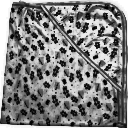

In [298]:
Image_PIL.fromarray(img_sift)

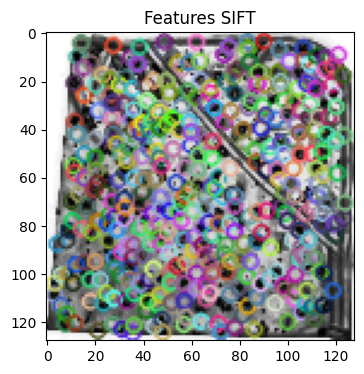

In [299]:
sift = cv2.SIFT_create()
kp = sift.detect(img_sift,None)
img=cv2.drawKeypoints(img_sift,kp,img_sift)

plt.figure(figsize=(4,4))
plt.title('Features SIFT')
plt.imshow(img)

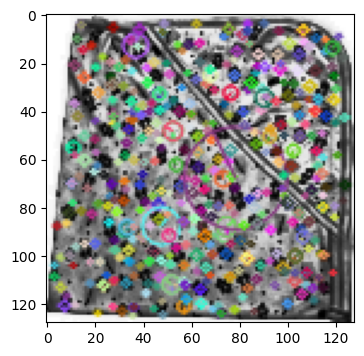

In [300]:
img=cv2.drawKeypoints(img_sift,kp,img_sift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(4,4))
plt.imshow(img)

**ORB**

In [301]:
img_orb = preprocess(img_echantillon.iloc[i]['image'], path=True)

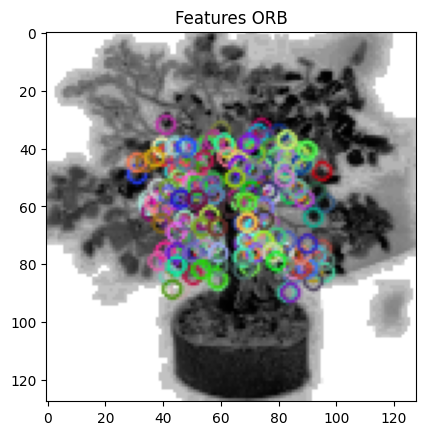

In [302]:
orb = cv2.ORB_create()

#find keypoints and descriptors
kp, des = orb.detectAndCompute(img_orb, mask = None)
#draw only keypoints location, not size and orientation:
image_orb = cv2.drawKeypoints(img_orb, kp, outImage = True, flags=2)
plt.title('Features ORB')
plt.imshow(image_orb)
plt.show()

In [303]:
len(kp)

241

In [304]:
des.shape

(241, 32)

**SURF**

In [305]:
img_surf = preprocess(img_echantillon.iloc[12]['image'], path=True)
import cv2
surf = cv2.xfeatures2d.SURF_create()

# surf = cv2.SURF.create()
kp = surf.detect(img_surf,None)
image_surf = cv2.drawKeypoints(img_surf, kp, outImage = True, flags=2)
plt.figure(figsize=(4,4))
plt.title('Features SURF')
plt.imshow(image_surf)

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

In [306]:
kp_surf, des_surf = sift.detectAndCompute(img_surf,None)

In [ ]:
des_surf[2].shape

In [ ]:
des_surf[0].shape

### Fonctions

In [ ]:
def get_files(path_list):
    '''Renvoie la liste des matrices d\'images à partir d'une liste de chemins'''
    liste_image = []
    compteur = 0
    for image_path in path_list:
        #im = cv2.imread(image_path, 0)
        im = np.array(Image_PIL.open(image_path))
        liste_image.append(im)
        compteur +=1
    return liste_image

In [ ]:
def create_features():
    '''Initialise un algorithme SURF'''
    return cv2.xfeatures2d.SURF_create()    

def features(surf, image):
    '''renvoie les keypoints et descripteurs d\'une image à partir du détecteur surf'''
    keypoints, descriptors = surf.detectAndCompute(image, None)
    return [keypoints, descriptors]

def pipeline_feature(image):
    '''traitement complet d\'une image : 
    * initialise l\'algorithme, 
    *prétraite l'image, 
    *recherche les features
    *retourne les features'''
    
    surf = create_features()
    image = preprocess(image, path=False)
    #gr = grey(image)
    keypoints, descriptors = features(surf, image)
    return keypoints, descriptors

In [ ]:
image_essai = get_files(img_echantillon['image'])[1]

In [ ]:
plt.imshow(image_essai)

In [ ]:

j=0

echantillon = get_files(img_echantillon['image'].tolist())
max_count = len(echantillon)
f = IntProgress(min=0, max=max_count) # instantiate the bar
chaine = str(0)+'/'+str(max_count)
g = Text(value=chaine)
display(f) # display the bar
display(g)
liste_keypoints = []
liste_descripteurs = []


for array_image in echantillon:
    j+=1
    kea, des = pipeline_feature(array_image)
    liste_keypoints.append(kea)
    liste_descripteurs.append(des)
    f.value = j # signal to increment the progress bar
    g.value =str(j)+'/'+str(max_count)

In [ ]:
liste_descripteurs[0].shape

In [ ]:
liste_descripteurs[0].reshape(1,-1)

In [ ]:
print('Nombre de liste de keypoints : ', len(liste_keypoints))
print('Nombre de keypoints pour l\'élément 0 : ', len(liste_keypoints[0]))
print('Nombre de keypoints pour l\'élément 2 : ', len(liste_keypoints[2]))

In [ ]:
print('Dimension descripteurs élément 0 : ', liste_descripteurs[0].shape)
print('Dimension descripteurs élément 1 : ', liste_descripteurs[1].shape)

In [ ]:
for el, ech in zip(liste_descripteurs, echantillon):
    print(el.shape, ' - ', ech.shape)

In [ ]:
plt.title('illustration des descripteurs d\'une image')
plt.imshow(liste_descripteurs[12], cmap='gray')

In [ ]:
plt.figure(figsize=(2,2))
plt.title('illustration d\'une feature')
plt.imshow(liste_descripteurs[0][12].reshape(8,8))

In [ ]:
def extraction_features(data_visu):
    '''Extraction des features à partir des données'''
    
    #chargement des images
    data_visu['image'] = data_visu['image'].apply(lambda x: 'data/Images/'+str(x))
    liste_images = get_files(data_visu['image'].tolist())
    max_count = len(liste_images)
    
    #affichage du compteur
    f = IntProgress(min=0, max=max_count) # instantiate the bar
    chaine = str(0)+'/'+str(max_count)
    g = Text(value=chaine)
    display(f) # display the bar
    display(g)
    liste_features = []
    liste_descripteurs = []
    liste_descripteurs_formates = []

    #boucle d'extraction des features de chaque image
    j=0
    for array_image in liste_images:
        j+=1
        fea, des = pipeline_feature(array_image)
        
        
        liste_features.append(fea)
        liste_descripteurs.append(des)
        f.value = j # signal to increment the progress bar
        g.value = str(j)+'/'+str(max_count)
    
    #harmonisation du nombre de features par image : détermination dimension maximum
    nb_features_max = 0
    for descripteur in liste_descripteurs:
        if descripteur.shape[0] > nb_features_max:
            nb_features_max = descripteur.shape[0]
    #on transforme les array des descripteurs en vecteurs (PM : un descripteur = 64 pixels de large)
    liste_descripteurs_flatten = []
    for descripteur in liste_descripteurs:
        liste_descripteurs_flatten.append(descripteur.reshape(1,-1))   
    
    #harmonisation du nombre de features par image : ajout pixels noirs
    k = 0
    for descripteur in liste_descripteurs_flatten:
        if descripteur.shape[0] <= nb_features_max*64:
            liste_descripteurs_formates.append(
                np.hstack([descripteur.reshape(1,-1), 
                           np.zeros(nb_features_max*64 - descripteur.shape[1]).reshape(1,-1)])
            )        
        else:
            liste_descripteurs_formates.append(descripteur)
            
    #assemblage_features
    array_descripteurs = np.vstack(liste_descripteurs_formates)
    
    del liste_descripteurs_formates, descripteur, liste_images, max_count
    
    
    return liste_features, liste_descripteurs, array_descripteurs

In [ ]:
data_visuelle = pd.concat([train, test]).copy()
#data_visuelle = data.sample(100, random_state=42)

features_total, descripteurs_total, descripteurs_array = extraction_features(data_visuelle)

In [ ]:
descripteurs_array.shape

In [ ]:
descripteurs_array[0,:]

In [ ]:
print(descripteurs_array.shape)
plt.figure(figsize=(10,10))
plt.imshow(descripteurs_array, cmap='gray')

export des descripteurs

### Création de nouvelles features à partir des descripteurs

In [ ]:
descripteurs_total[0].shape

In [ ]:
np.var(descripteurs_total[0])

In [ ]:
from scipy.stats import moment

liste_min = [np.min(descripteur) for descripteur in descripteurs_total]
liste_max = [np.max(descripteur) for descripteur in descripteurs_total]
liste_mean = [np.mean(descripteur) for descripteur in descripteurs_total]
liste_var = [np.var(descripteur) for descripteur in descripteurs_total]
liste_order_3 = [np.mean(moment(descripteur, moment = 3, axis=1)) for descripteur in descripteurs_total]
liste_order_4 = [np.mean(moment(descripteur, moment = 4, axis=1)) for descripteur in descripteurs_total]

In [ ]:
array_features_descripteurs = np.vstack([liste_min, liste_max, liste_mean, liste_var, liste_order_3, liste_order_4])

In [ ]:
%matplotlib inline

plt.figure()
plt.title('Min')
sns.distplot(liste_var)

plt.figure()
plt.title('Max')
sns.distplot(liste_max)

plt.figure()
plt.title('Mean')
sns.distplot(liste_mean)

plt.figure()
plt.title('Var')
sns.distplot(liste_var)

plt.figure()
plt.title('Mean Moment 3rd order')
sns.distplot(liste_order_3)

plt.figure()
plt.title('Mean Moment 4th order')
sns.distplot(liste_order_4)

### Export

In [ ]:
np.save('data_saved/array_descripteurs.csv', descripteurs_array)
np.save('data_saved/array_features_descripteurs', array_features_descripteurs)

## Classifieur non supervisé

### ACP

In [ ]:
pca_descripteurs = PCA()
features_ss = StandardScaler()
pca_descripteurs.fit(features_ss.fit_transform(np.transpose(descripteurs_array.T)))

In [ ]:
pca_descripteurs.n_components_

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Somme cumulée de variance des composantes de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(descripteurs_array.shape[0])),
         np.cumsum(pca_descripteurs.explained_variance_ratio_))

In [ ]:
np.cumsum(pca_descripteurs.explained_variance_ratio_)[650]

95 % de la variance totale avec 650 features

In [ ]:
array_descripteurs_reduit = pca_descripteurs.transform(descripteurs_array[:650,:])

In [ ]:
array_descripteurs_reduit.shape

In [ ]:
np.save('data_saved/array_descripteurs_reduit.csv', array_descripteurs_reduit)

### Classification

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

#### Kmeans

In [ ]:
dict_kmeans = {}
inertia = {}
max_clusters=80

f = IntProgress(min=0, max=max_clusters) # instantiate the bar
chaine = str(0)+'/'+str(max_count)
g = Text(value=chaine)
display(f) # display the bar
display(g)

for k in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(array_descripteurs_reduit)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    f.value = k # signal to increment the progress bar
    g.value =str(k+1)+'/'+str(max_clusters)

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia.keys()),
             list(inertia.values())
            )

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:

silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = array_descripteurs_reduit,
                                             labels= list(dict_kmeans[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()



In [ ]:
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters = key

#### Visualisation des visual words

Exemple en prenant une séparation avec clusters

In [ ]:
plt.title('Visualisation d\'un visual word (après transformation inverse PCA)')

plt.imshow(np.dot(dict_kmeans[25].cluster_centers_[4], pca_descripteurs.components_[:, :650]).reshape(26,25))

#### Histogrammes

## CNN Données visuelles

### Report fonctions

In [ ]:
def get_files(path_list):
    '''Renvoie la liste des matrices d\'images à partir d'une liste de chemins'''
    liste_image = []
    compteur = 0
    for image_path in path_list:
        #im = cv2.imread(image_path, 0)
        im = np.array(Image_PIL.open(image_path))
        liste_image.append(im)
        compteur +=1
    
    del compteur
    del im
    
    return liste_image

In [ ]:
def redim(array_im, width, height):
    '''Redimensionne l\'image correspondant à array_im dans la largeur et la hauteur définie'''
    min_x = 100000
    max_x = 0
    min_y = 100000
    max_y = 0
    shape = array_im.shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]
    im = cv2.resize(array_im, dsize=(width,height))
    
    del shape
    
    return im

### Données

In [ ]:
train['image'] = train['image'].apply(lambda x: 'data/Images/'+str(x))
test['image'] = test['image'].apply(lambda x: 'data/Images/'+str(x))

In [ ]:
train_cnn = get_files(train.copy()['image'].tolist())
test_cnn = get_files(test.copy()['image'].tolist())

In [ ]:
len(train_cnn)

In [ ]:
len(test_cnn)

In [ ]:
redim(train_cnn[0], 128, 128).shape

In [ ]:
redim(train_cnn[0], 128, 128).reshape(1,-1,3).shape

In [ ]:
train_array_cnn = np.vstack([redim(img, 128, 128).reshape(1,128,128,3) for img in train_cnn])
test_array_cnn = np.vstack([redim(img, 128, 128).reshape(1,128,128,3) for img in test_cnn])

In [ ]:
train_array_cnn.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
array_cats = ohe.fit_transform(np.array(train['cat_lvl_2']).reshape(-1,1))

In [ ]:
array_cats.todense().shape

In [ ]:
array_cats.shape

In [ ]:
train_array_cats = ohe.transform(train[['cat_lvl_2']]).todense()
test_array_cats = ohe.transform(test[['cat_lvl_2']]).todense()

In [ ]:
ohe.categories_

### Construction Réseau

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Activation

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,128,3,)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(ohe.categories_[0].shape[0], activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
model.summary()

### Entraînement

In [ ]:
train_array_cnn.shape

In [ ]:
model_info = model.fit(train_array_cnn, train_array_cats, epochs=3, batch_size=40, verbose=2)

In [ ]:
for couche in model.get_weights():
    print(couche.shape)

In [ ]:
predictions_test = model.predict(test_array_cnn)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(predictions_test, axis=1).reshape(-1,1), 
               np.argmax(test_array_cats, axis=1).reshape(-1,1))

In [ ]:
np.argmax(test_array_cats, axis=1).reshape(1,-1)

In [ ]:
np.argmax(predictions_test, axis=1)

In [ ]:
ohe.categories_[0][25]

### Observations

<span style='color:red'>8 % d'accuracy mais la prédiction est la même pour toutes les images du jeu de données. 
La catégorie prédite est la catégorie la plus représentée dans notre jeu de données de base.
Le résultat n'est pas concluant</span>

### Classification non supervisée 

In [ ]:
from keras.models import clone_model

On retire les 2 dernières couches du réseau de neurone pour accéder aux features

In [ ]:
unsupervised_model= clone_model(model)
unsupervised_model.layers.pop()
unsupervised_model.layers.pop()
unsupervised_model.compile(loss='mean_squared_error', optimizer='sgd')


In [ ]:
unsupervised_array = unsupervised_model.predict(train_array_cnn)

In [ ]:
unsupervised_array.shape

In [ ]:
dict_kmeans = {}
inertia = {}
max_clusters=50

f = IntProgress(min=0, max=max_clusters) # instantiate the bar
chaine = str(0)+'/'+str(max_clusters)
g = Text(value=chaine)
display(f) # display the bar
display(g)

for k in range(1,max_clusters+1):
    kmeans = KMeans(n_clusters=k,
                   verbose=1,
                   random_state=0,
                   n_jobs=-1).fit(unsupervised_array)
    inertia[k] = kmeans.inertia_
    dict_kmeans[k] = kmeans
    f.value = k # signal to increment the progress bar
    g.value =str(k+1)+'/'+str(max_clusters)

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Kmeans: Comparaison de la somme des inerties en fonction du nombre de clusters')
sns.lineplot(list(inertia.keys()),
             list(inertia.values())
            )

In [ ]:
silhouettes_kmeans = {}
for i in range(2,max_clusters):
    silhouettes_kmeans[i] = silhouette_score(X = unsupervised_array,
                                             labels= list(dict_kmeans[i].labels_))

plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre de clusters (kmeans)')
sns.scatterplot(x = list(silhouettes_kmeans.keys()),
               y = list(silhouettes_kmeans.values()))
plt.show()



In [ ]:
for key, value in silhouettes_kmeans.items():
    if value == max(silhouettes_kmeans.values()):
        print('le coefficient de silhouette est maximal pour {} clusters (score = {})'.format(key, value))
        nb_clusters_optimal = key

Nombre d'éléments par catégorie

In [ ]:
pd.DataFrame(dict_kmeans[8].labels_)[0].value_counts()

In [ ]:
train_labelized = train.copy()
train_labelized['label_kmeans'] = dict_kmeans[nb_clusters_optimal].labels_

In [ ]:
train_labelized.groupby(['label_kmeans']).apply(lambda x: (x.groupby('cat_lvl_2')
                                      .count()
                                      .sort_values('cat_lvl_2', ascending=False))
                                     )['uniq_id']

In [ ]:
pd.DataFrame(train, )

In [ ]:
%matplotlib inline
k = 0
for image in train_labelized[train_labelized['label_kmeans'] == 0]['image'].tolist():
    if k < 20:
        chemin = image
        plt.figure()
        plt.imshow(Image_PIL.open(chemin))
        plt.show()
        k+=1
    else:
        break

In [193]:
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.tokenize import word_tokenize
import random
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.classify.util import accuracy

# Charger votre DataFrame

data_nbc = data.copy()
# Supprimer les lignes avec des valeurs manquantes dans les colonnes d'intérêt
data_nbc = data_nbc.dropna(subset=['description', 'cat_lvl_2'])

# Prétraitement des données : tokenisation, suppression des stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return dict([(word, True) for word in tokens])

# Appliquer le prétraitement
data_nbc['features'] = data_nbc['description'].apply(preprocess)

# Créer un ensemble de données d'entraînement et de test
train_data, test_data = train_test_split(data_nbc, test_size=0.2, random_state=42)

# Préparer les données d'entraînement au format attendu par NLTK
train_set = [(features, label) for features, label in zip(train_data['features'], train_data['cat_lvl_2'])]

# Entraîner le classificateur Naive Bayes
classifier = NaiveBayesClassifier.train(train_set)

# Préparer les données de test au format attendu par NLTK
test_set = [(features, label) for features, label in zip(test_data['features'], test_data['cat_lvl_2'])]

# Évaluer la précision du classificateur sur les données de test
accuracy_score = accuracy(classifier, test_set)
print(f'Précision du classificateur : {accuracy_score:.2%}')

Précision du classificateur : 36.67%



Dans ce code :

- Nous prétraitons les données en les tokenisant, en convertissant en minuscules et en supprimant les stopwords.
- Nous divisons les données en un ensemble d'entraînement et un ensemble de test à l'aide de `train_test_split`.
- Nous formons le modèle Naive Bayes sur l'ensemble d'entraînement.
- Nous évaluons la précision du modèle sur l'ensemble de test.


In [206]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Charger votre DataFrame depuis vos données (Assurez-vous d'avoir déjà chargé vos données dans 'data')
df = data.copy()

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['cat_lvl_2'], test_size=0.2, random_state=42)

# Créer un vecteur de caractéristiques en utilisant un Bag-of-Words binaire
vectorizer = CountVectorizer(binary=True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entraînement des modèles
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Augmentez max_iter si nécessaire
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}")
    print(f'Précision du classificateur : {name} - {accuracy:.2%}')

Naive Bayes - Accuracy: 0.53
Précision du classificateur : Naive Bayes - 52.86%
Logistic Regression - Accuracy: 0.86
Précision du classificateur : Logistic Regression - 86.19%
SVM - Accuracy: 0.68
Précision du classificateur : SVM - 67.62%
Random Forest - Accuracy: 0.81
Précision du classificateur : Random Forest - 80.95%


In [204]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from nltk.classify import NaiveBayesClassifier
# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')

# # Charger votre DataFrame depuis vos données (Assurez-vous d'avoir déjà chargé vos données dans 'data')
# # Supprimez les colonnes inutiles pour la classification (conservez uniquement 'description' et 'cat_lvl_2')
# df = data[['description', 'cat_lvl_2']].copy()

# # Nettoyage des données : convertir les données en texte Unicode en spécifiant l'encodage (UTF-8)
# df['description'] = df['description'].str.decode('utf-8', errors='ignore')

# # Assurez-vous que toutes les données textuelles sont des chaînes de caractères
# df['description'] = df['description'].astype(str)

# # Division des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(df['description'], df['cat_lvl_2'], test_size=0.2, random_state=42)

# # Créer un vecteur de caractéristiques en utilisant un Bag-of-Words binaire
# vectorizer = CountVectorizer(binary=True)
# X_train_vectorized = vectorizer.fit_transform(X_train)
# X_test_vectorized = vectorizer.transform(X_test)

# # Convertir les représentations vectorielles en texte
# X_train_text = [vectorizer.inverse_transform(vec)[0] for vec in X_train_vectorized]
# X_test_text = [vectorizer.inverse_transform(vec)[0] for vec in X_test_vectorized]

# # Entraînement des modèles
# models = {
#     "Naive Bayes MultinomialNB": MultinomialNB(),
#     "Logistic Regression": LogisticRegression(max_iter=1000),  # Augmentez max_iter si nécessaire
#     "SVM": SVC(),
#     "Random Forest": RandomForestClassifier(),
#     "Naive Bayes Classifier": NaiveBayesClassifier.train([(word_tokenize(desc), cat) for desc, cat in zip(X_train_text, y_train)])
# }

# for name, model in models.items():
#     if name == "Naive Bayes Classifier":
#         y_pred = [model.classify(word_tokenize(desc)) for desc in X_test_text]
#     else:
#         model.fit(X_train_vectorized, y_train)
#         y_pred = model.predict(X_test_vectorized)
    
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{name} - Accuracy: {accuracy:.2f}")


In [215]:
data.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
857,a41371b2f8859b015031f0d5eda5184c,2015-12-29 05:07:38 +0000,http://www.flipkart.com/99gems-smart-otg-conne...,99Gems Smart OTG Connection kit USB USB Cable,"[""Computers >> Laptop Accessories >> USB Gadge...",USGEDSKFXUHKEGME,399.0,199.0,a41371b2f8859b015031f0d5eda5184c.jpg,False,99Gems Smart OTG Connection kit USB USB Cable ...,No rating available,No rating available,99Gems,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
598,291d5ff1e50dac3058cf10578f692085,2016-01-04 05:43:32 +0000,http://www.flipkart.com/saco-karbonn-smart-ta-...,Saco Karbonn Smart Ta Fone A37 Hd Tablet Wired...,"[""Computers >> Tablet Accessories >> Keyboards...",ACCE4JKYGQGYYHBG,550.0,500.0,291d5ff1e50dac3058cf10578f692085.jpg,False,Buy Saco Karbonn Smart Ta Fone A37 Hd Tablet W...,No rating available,No rating available,Saco,"{""product_specification""=>[{""key""=>""Interface""..."
587,6b04c746cac2aa811d7a8753e54dc96e,2016-01-07 05:50:25 +0000,http://www.flipkart.com/maxima-07034lmli-attiv...,Maxima 07034LMLI Attivo Analog Watch - For Women,"[""Watches >> Wrist Watches >> Maxima Wrist Wat...",WATDYFQ557AP8EVM,675.0,641.0,6b04c746cac2aa811d7a8753e54dc96e.jpg,False,Maxima 07034LMLI Attivo Analog Watch - For Wo...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
761,294a26262643797cb07f72f1b55262ae,2015-12-12 11:46:53 +0000,http://www.flipkart.com/perucci-pc-301-analog-...,Perucci PC-301 Analog Watch - For Men,"[""Watches >> Wrist Watches >> Perucci Wrist Wa...",WATE3FAGH3DKJSFC,2500.0,1395.0,294a26262643797cb07f72f1b55262ae.jpg,False,Perucci PC-301 Analog Watch - For Men - Buy P...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Type"", ""va..."
298,2971287a1ac427bd98c4778112d20d06,2016-03-18 14:30:46 +0000,http://www.flipkart.com/jayenterprise-plastic-...,JayEnterprise Plastic Hand Juicer,"[""Kitchen & Dining >> Kitchen Tools >> Kitchen...",HJREGXNFQMRPYVU3,1499.0,750.0,2971287a1ac427bd98c4778112d20d06.jpg,False,Specifications of JayEnterprise Plastic Hand J...,No rating available,No rating available,JayEnterprise,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


# Étape 7 : Création et entraînement d'un modèle d'apprentissage profond
    # CE1 : Définir la stratégie d'élaboration d'un modèle
    # CE2 : Identifier les cibles
    # CE3 : Séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
    # CE4 : Éviter les fuites d'information entre les jeux de données
    # CE5 : Tester plusieurs modèles d'apprentissage profond
    # CE6 : Mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)


In [255]:
# data = pd.read_csv('data/flipkart_com-ecommerce_sample_1050.csv')
# Charger les données depuis un fichier (data.csv par exemple)
data = data_level.copy()

In [258]:
!pip uninstall tensorflow
!pip install tensorflow==2.5.0
import tensorflow as tf
print(tf.__version__)

^C
Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 422.6/422.6 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
     --------------------------------------- 13.3/13.3 MB 50.4 MB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 63.4 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 57.3 MB/s eta 0:00:00
     -------------------------------------- 132.0/132.0 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.2/1.2 MB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 462.4/462.4 kB 30.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 59.1 MB/s eta 0:00:00

ERROR: Could not install packages due to an OSError: [WinError 5] Accès refusé: 'C:\\Users\\Zbook\\AppData\\Roaming\\Python\\Python39\\site-packages\\google\\~upb\\_message.cp39-win_amd64.pyd'
Check the permissions.



In [228]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Fonction pour définir la stratégie d'élaboration d'un modèle
def define_model_strategy(business_need):
    """
    Définit la stratégie du modèle en réponse à un besoin métier spécifique.

    Parameters:
    business_need (str): Une description du besoin métier qui influencera la stratégie du modèle.

    Returns:
    model_strategy (str): Une chaîne de caractères décrivant la stratégie du modèle en fonction du besoin métier.
    """

    # Exemple générique : stratégie basée sur un besoin métier
    if "réutilisation de modèles pré-entraînés" in business_need:
        model_strategy = "Utilisation de modèles pré-entraînés pour accélérer le développement."
    else:
        model_strategy = "Conception d'un modèle personnalisé pour répondre au besoin métier spécifique."

    return model_strategy

# # Fonction pour identifier les cibles
# def identify_targets(data):
#     # Exemple : supposons que la colonne "cat_lvl_1" contienne les cibles
#     targets = data['cat_lvl_1']
#     return targets

# Fonction pour identifier les cibles
def identify_targets(data):
    # Sélectionnez les trois colonnes cat_lvl_1, cat_lvl_2 et cat_lvl_3 comme cibles
    targets = data[['cat_lvl_1', 'cat_lvl_2', 'cat_lvl_3']]
    return targets

# Fonction pour séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
def split_data(data):
    X_train, X_temp, y_train, y_temp = train_test_split(data['description'], data['cat_lvl_1'], test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Fonction pour éviter les fuites d'information entre les jeux de données
# def avoid_data_leakage(X_train, X_val, X_test, y_train, y_val, y_test):
#     # Code pour éviter les fuites d'information
#     # Vous pouvez implémenter votre logique ici
#     # Par exemple, si vous devez effectuer un prétraitement spécifique pour éviter les fuites, faites-le ici

#     return X_train, X_val, X_test, y_train, y_val, y_test

# Fonction pour éviter les fuites d'information entre les jeux de données
def avoid_data_leakage(X_train, X_val, X_test):
    # Créez un vecteur de caractéristiques en utilisant TF-IDF
    vectorizer = TfidfVectorizer()
    
    # Ajustez le vecteur de caractéristiques sur le jeu d'entraînement
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    # Transformez les jeux de validation et de test en utilisant le même vecteur de caractéristiques
    X_val_tfidf = vectorizer.transform(X_val)
    X_test_tfidf = vectorizer.transform(X_test)
    
    # Vérifiez s'il y a une fuite d'information entre les jeux de données
    if not (X_train_tfidf.indices == X_val_tfidf.indices).all() or \
       not (X_train_tfidf.indices == X_test_tfidf.indices).all():
        print("Attention : Il y a une fuite d'information entre les jeux de données !")
    else:
        print("Aucune fuite d'information entre les jeux de données.")
    
    return X_train_tfidf, X_val_tfidf, X_test_tfidf


# Fonction pour tester plusieurs modèles d'apprentissage profond
def test_deep_learning_models(X_train, y_train, X_val, y_val):
    models = []

    # Modèle simple avec une couche Dense
    model1 = Sequential()
    model1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model1.add(Dense(1, activation='sigmoid'))
    models.append(("Dense Model", model1))

    # Modèle avec une couche d'embedding et LSTM
    model2 = Sequential()
    model2.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model2.add(LSTM(64))
    model2.add(Dense(1, activation='sigmoid'))
    models.append(("Embedding + LSTM Model", model2))

    # Modèle avec une couche de convolution (Conv1D) et MaxPooling
    model3 = Sequential()
    model3.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model3.add(Conv1D(64, 5, activation='relu'))
    model3.add(MaxPooling1D(5))
    model3.add(GlobalMaxPooling1D())
    model3.add(Dense(1, activation='sigmoid'))
    models.append(("Conv1D + MaxPooling Model", model3))

    # Modèle avec une couche Bidirectional LSTM
    model4 = Sequential()
    model4.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model4.add(Bidirectional(LSTM(64)))
    model4.add(Dense(1, activation='sigmoid'))
    models.append(("Bidirectional LSTM Model", model4))

    # Modèle avec plusieurs couches Dropout
    model5 = Sequential()
    model5.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model5.add(Dropout(0.5))
    model5.add(Dense(32, activation='relu'))
    model5.add(Dropout(0.5))
    model5.add(Dense(1, activation='sigmoid'))
    models.append(("Dropout Model", model5))

    best_model = None
    best_accuracy = 0.0

    for model_name, model in models:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=0)
        _, accuracy = model.evaluate(X_val, y_val)
        print(f"Model '{model_name}' Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model

# Fonction pour mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
def implement_transfer_learning(X_train, y_train, X_val, y_val, base_model_name="VGG16", num_classes=2, epochs=10):
    # Charger un modèle pré-entraîné (par exemple, VGG16 ou ResNet50)
    if base_model_name == "VGG16":
        base_model = VGG16(weights='imagenet', include_top=False)
    elif base_model_name == "ResNet50":
        base_model = ResNet50(weights='imagenet', include_top=False)
    else:
        raise ValueError("Nom de modèle pré-entraîné non pris en charge.")

    # Ajouter des couches personnalisées au modèle pré-entraîné
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Créer un modèle combinant le modèle pré-entraîné et les couches personnalisées
    model = Model(inputs=base_model.input, outputs=predictions)

    # Geler les couches du modèle pré-entraîné (sauf les couches personnalisées)
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler le modèle
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle avec les données d'entraînement
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

    return model


# Fonction principale pour l'entraînement du modèle d'apprentissage profond
def train_deep_learning_model(data):
    # Étape 1 : Définir la stratégie d'élaboration d'un modèle
    model_strategy = define_model_strategy(data)

    # Étape 2 : Identifier les cibles
    targets = identify_targets(data)

    # Étape 3 : Séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

#     # Étape 4 : Éviter les fuites d'information entre les jeux de données
#     X_train, X_val, X_test = avoid_data_leakage(X_train, X_val, X_test)
    # Étape 4 : Éviter les fuites d'information entre les jeux de données
    X_train, X_val, X_test, y_train, y_val, y_test = avoid_data_leakage(X_train, X_val, X_test, y_train, y_val, y_test)


    # Étape 5 : Tester plusieurs modèles d'apprentissage profond
    best_model = test_deep_learning_models(X_train, y_train, X_val, y_val)

    # Étape 6 : Mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
    transfer_learning_model = implement_transfer_learning(X_train, y_train, X_val, y_val)

    return best_model, transfer_learning_model


# Appel de la fonction principale
best_model, transfer_learning_model = train_deep_learning_model(data)


In [251]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.compat.v1.experimental.output_all_intermediates(True)

# Fonction pour définir la stratégie d'élaboration d'un modèle
def define_model_strategy(business_need):
    """
    Définit la stratégie du modèle en réponse à un besoin métier spécifique.

    Parameters:
    business_need (str): Une description du besoin métier qui influencera la stratégie du modèle.

    Returns:
    model_strategy (str): Une chaîne de caractères décrivant la stratégie du modèle en fonction du besoin métier.
    """

    # Exemple générique : stratégie basée sur un besoin métier
    if "réutilisation de modèles pré-entraînés" in business_need:
        model_strategy = "Utilisation de modèles pré-entraînés pour accélérer le développement."
    else:
        model_strategy = "Conception d'un modèle personnalisé pour répondre au besoin métier spécifique."

    return model_strategy

# Fonction pour identifier les cibles
def identify_targets(data):
    # Sélectionnez les trois colonnes cat_lvl_1, cat_lvl_2 et cat_lvl_3 comme cibles
    targets = data[['cat_lvl_1', 'cat_lvl_2', 'cat_lvl_3']]
    return targets

# Fonction pour séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
def split_data(data):
    X_train, X_temp, y_train, y_temp = train_test_split(data['description'], data['cat_lvl_1'], test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Fonction pour éviter les fuites d'information entre les jeux de données
def avoid_data_leakage(X_train, X_val, X_test):
    # Créez un vecteur de caractéristiques en utilisant TF-IDF
    vectorizer = TfidfVectorizer()
    
    # Ajustez le vecteur de caractéristiques sur le jeu d'entraînement
    X_train_tfidf = vectorizer.fit_transform(X_train)
    
    # Transformez les jeux de validation et de test en utilisant le même vecteur de caractéristiques
    X_val_tfidf = vectorizer.transform(X_val)
    X_test_tfidf = vectorizer.transform(X_test)
    
    # Vérifiez s'il y a une fuite d'information entre les jeux de données
    if not np.array_equal(X_train_tfidf.toarray(), X_val_tfidf.toarray()) or \
       not np.array_equal(X_train_tfidf.toarray(), X_test_tfidf.toarray()):
        print("Attention : Il y a une fuite d'information entre les jeux de données !")
    else:
        print("Aucune fuite d'information entre les jeux de données.")
    
    return X_train_tfidf, X_val_tfidf, X_test_tfidf


# Fonction pour tester plusieurs modèles d'apprentissage profond
# Fonction pour tester plusieurs modèles d'apprentissage profond
def test_deep_learning_models(X_train, y_train, X_val, y_val):
    models = []

    # Modèle simple avec une couche Dense
    model1 = Sequential()
    model1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model1.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Dense Model", model1))

    # Modèle avec une couche d'embedding et LSTM
    model2 = Sequential()
    model2.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model2.add(LSTM(64))
#     model2.add(LSTM(64, return_sequences=True)) 
    model2.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Embedding + LSTM Model", model2))

    # Modèle avec une couche de convolution (Conv1D) et MaxPooling
    model3 = Sequential()
    model3.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model3.add(Conv1D(64, 5, activation='relu'))
    model3.add(MaxPooling1D(5))
    model3.add(GlobalMaxPooling1D())
    model3.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Conv1D + MaxPooling Model", model3))

    # Modèle avec une couche Bidirectional LSTM
    model4 = Sequential()
    model4.add(Embedding(input_dim=X_train.shape[1], output_dim=64, input_length=X_train.shape[1]))
    model4.add(Bidirectional(LSTM(64)))
    model4.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Bidirectional LSTM Model", model4))

    # Modèle avec plusieurs couches Dropout
    model5 = Sequential()
    model5.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
    model5.add(Dropout(0.5))
    model5.add(Dense(32, activation='relu'))
    model5.add(Dropout(0.5))
    model5.add(Dense(y_train.shape[1], activation='softmax'))  # Utilisation de softmax pour la classification multi-classe
    models.append(("Dropout Model", model5))

    best_model = None
    best_accuracy = 0.0

    for model_name, model in models:
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#         model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=0)
        model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)
        _, accuracy = model.evaluate(X_val, y_val)
        print(f"Model '{model_name}' Accuracy: {accuracy}")
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model

    return best_model

# Fonction pour mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
def implement_transfer_learning(X_train, y_train, X_val, y_val, base_model_name="VGG16", num_classes=2, epochs=10):
    # Charger un modèle pré-entraîné (par exemple, VGG16 ou ResNet50)
    if base_model_name == "VGG16":
        base_model = VGG16(weights='imagenet', include_top=False)
    elif base_model_name == "ResNet50":
        base_model = ResNet50(weights='imagenet', include_top=False)
    else:
        raise ValueError("Nom de modèle pré-entraîné non pris en charge.")

    # Ajouter des couches personnalisées au modèle pré-entraîné
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Créer un modèle combinant le modèle pré-entraîné et les couches personnalisées
    model = Model(inputs=base_model.input, outputs=predictions)

    # Geler les couches du modèle pré-entraîné (sauf les couches personnalisées)
    for layer in base_model.layers:
        layer.trainable = False

    # Compiler le modèle
    model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle avec les données d'entraînement
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val))

    return model

# # Fonction principale pour l'entraînement du modèle d'apprentissage profond
# def train_deep_learning_model(data):
#     # Étape 1 : Définir la stratégie d'élaboration d'un modèle
#     model_strategy = define_model_strategy(data)

#     # Étape 2 : Identifier les cibles
#     targets = identify_targets(data)

#     # Étape 3 : Séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
#     X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

#     # Étape 4 : Éviter les fuites d'information entre les jeux de données
#     X_train, X_val, X_test = avoid_data_leakage(X_train, X_val, X_test)

#     # Étape 5 : Tester plusieurs modèles d'apprentissage profond
#     best_model = test_deep_learning_models(X_train, y_train, X_val, y_val)

#     # Étape 6 : Mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
#     transfer_learning_model = implement_transfer_learning(X_train, y_train, X_val, y_val)

#     return best_model, transfer_learning_model

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ...

# Fonction principale pour l'entraînement du modèle d'apprentissage profond
def train_deep_learning_model(data):
    # Étape 1 : Définir la stratégie d'élaboration d'un modèle
    model_strategy = define_model_strategy(data)

    # Étape 2 : Identifier les cibles
    targets = identify_targets(data)

    # Étape 3 : Séparer le jeu de données en jeu d'entraînement, jeu de validation et jeu de test
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

    # Étape 4 : Éviter les fuites d'information entre les jeux de données
    X_train, X_val, X_test = avoid_data_leakage(X_train, X_val, X_test)

    # Étape 5 : Encoder les étiquettes (cibles)
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_val_encoded = label_encoder.transform(y_val)
    y_test_encoded = label_encoder.transform(y_test)

    # Convertir les étiquettes en vecteurs de classe one-hot
    num_classes = len(label_encoder.classes_)
    y_train_encoded_one_hot = to_categorical(y_train_encoded, num_classes)
    y_val_encoded_one_hot = to_categorical(y_val_encoded, num_classes)
    y_test_encoded_one_hot = to_categorical(y_test_encoded, num_classes)

    # Étape 6 : Tester plusieurs modèles d'apprentissage profond
    best_model = test_deep_learning_models(X_train, y_train_encoded_one_hot, X_val, y_val_encoded_one_hot)

    # Étape 7 : Mettre en œuvre des modèles à partir de modèles pré-entraînés (Transfer Learning)
    transfer_learning_model = implement_transfer_learning(X_train, y_train_encoded_one_hot, X_val, y_val_encoded_one_hot)

    return best_model, transfer_learning_model

# ...


In [252]:
# Appel de la fonction principale
best_model, transfer_learning_model = train_deep_learning_model(data)

Attention : Il y a une fuite d'information entre les jeux de données !
Train on 735 samples, validate on 157 samples


InvalidArgumentError: Graph execution error:

Node 'training_6/Adam/gradients/gradients/lstm_4/while_grad/lstm_4/while_grad': Connecting to invalid output 45 of source node lstm_4/while which has 45 outputs. Try using tf.compat.v1.experimental.output_all_intermediates(True).

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify import NaiveBayesClassifier
import re
import numpy as np
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM
from tensorflow.keras.initializers import Constant

nltk.download('punkt')

def preprocess_text(text):
    # Mettez en minuscules
    text = text.lower()
    # Supprimez la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    return text

def train_deep_learning_model(data):
    # Étape 1 : Prétraitement des données
    data['description'] = data['description'].apply(preprocess_text)

    # Étape 2 : Extraction des caractéristiques
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(data['description'])
    X = tokenizer.texts_to_sequences(data['description'])
    X = pad_sequences(X, maxlen=100)

    # Étape 3 : Encodage de la variable cible
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data['cat_lvl_1'])

    # Étape 4 : Séparation en ensembles d'entraînement, de validation et de test
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    # Étape 5 : Création du modèle d'apprentissage profond
    model = Sequential()
    model.add(Embedding(5000, 100, input_length=100))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Étape 6 : Entraînement du modèle
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)

    # Étape 7 : Évaluation du modèle
    accuracy = model.evaluate(X_test, y_test)[1]

    return model, accuracy

# Appel de la fonction principale
best_model, accuracy = train_deep_learning_model(data)

print("Précision du modèle:", accuracy)


AttributeError: module 'tensorflow.python.training.experimental.mixed_precision' has no attribute '_register_wrapper_optimizer_cls'

Dans ce code, un modèle d'apprentissage profond basé sur des réseaux de neurones est testé, entraîné et évalué. Le modèle est construit avec TensorFlow et Keras. Voici les détails du modèle testé :

- **Type de modèle**: Réseau de neurones artificiels (Deep Learning)
- **Architecture du modèle** :
  - Une couche d'embedding avec une dimension d'embedding de 100 et une longueur d'entrée de 100.
  - Une couche de flattening pour aplatir les données.
  - Une couche Dense (entièrement connectée) avec 128 neurones et une activation ReLU.
  - Une autre couche Dense avec 64 neurones et une activation ReLU.
  - Une couche de sortie Dense avec un nombre de neurones égal au nombre de catégories cibles, utilisant une activation softmax pour la classification.
- **Fonction de perte**: Entropie croisée catégorique épars (sparse categorical cross-entropy).
- **Optimiseur**: Adam (une méthode d'optimisation).
- **Métrique d'évaluation**: Précision (accuracy).

Ce modèle est entraîné sur les données d'entraînement, évalué sur les données de test et la précision est calculée pour mesurer ses performances.

# Annexe : Check mémoire

In [ ]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
pd.DataFrame(sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True))

In [ ]:
%reset_selective train_array_cnn

In [ ]:
#%reset_selective -f [image_essai, im, im2, array_image, ech, data_visuelle]